In [1]:
print("hello")
from datetime import datetime
import os
import pandas as pd
from datetime import datetime, timezone, timedelta
import pytz
import re
import numpy as np
import logging

hello


In [3]:
file_path = "SCRAPED_MERGED_DATA_PROCESSED.csv"
df = pd.read_csv(file_path)
df.head(10)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
df['TO'] = df['TO'].str.extract(r'\((\w+)\)')
df['FROM'] = df['FROM'].str.extract(r'\((\w+)\)')

In [4]:
df.tail(10)

Airline Code Aircraft Registration            Operator Type Code  \
11844162       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844163       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844164       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844165       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844166       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844167       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844168       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844169       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844170       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11844171       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  FLIGHT  \
11844162  76CC81       67157.0         0.0  28 Sep 2024  SIN  DPS   SQ944   
11844163  76CC81       67157.0         0.0  28 Sep 2024  DPS  SIN   SQ935   
11844164  76CC81       67157.0         0.0  28 Sep 2024  SIN  DPS   SQ934   
11844165  76CC81       67157.0         0.0  27 Sep 2024  DPS  SIN   SQ947   
11844166  76CC81       67157.0         0.0  27 Sep 2024  SIN  DPS   SQ946   
11844167  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  SQ8879   
11844168  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  SQ8879   
11844169  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS   BOE26   
11844170  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS   BOE26   
11844171  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS   BOE26   

          FLIGHT TIME(mins)       STD       ATD       STA           STATUS  \
11844162              133.0  16:10:00  16:29:00  18:50:00   Landed 6:41 PM   
11844163              133.0  10:20:00  10:33:00  13:05:00  Landed 12:46 PM   
11844164              133.0  06:45:00  07:00:00  09:20:00   Landed 9:13 AM   
11844165              136.0  21:35:00  21:48:00  00:10:00  Landed 12:04 AM   
11844166              129.0  17:40:00  18:00:00  20:40:00   Landed 8:10 PM   
11844167              371.0  19:30:00  13:19:00  18:30:00   Landed 6:30 PM   
11844168              861.0  08:00:00  08:34:00  11:55:00  Landed 11:55 AM   
11844169              184.0  13:30:00  14:24:00  16:27:00   Landed 4:27 PM   
11844170               14.0  18:45:00  19:05:00  19:02:00   Landed 7:18 PM   
11844171               54.0  11:45:00  13:23:00  13:17:00   Landed 1:17 PM   

         Color Code       ATA  
11844162      green  18:41:00  
11844163      green  12:46:00  
11844164      green  09:13:00  
11844165      green  00:04:00  
11844166      green  20:10:00  
11844167       gray  18:30:00  
11844168       gray  11:55:00  
11844169       gray  16:27:00  
11844170     yellow  19:18:00  
11844171       gray  13:17:00

In [ ]:
df.to_csv('SCRAPED_MERGED_DATA_PROCESSED_IATA.csv', index=False)

# Clean Timings

In [7]:
df.head(25)

Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9        3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
10       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
11       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
12       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
13       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
14       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
15       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
16       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
17       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
18       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
19       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
20       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
21       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
22       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
23       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
24       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

   Serial Number  Age(years)         DATE FROM   TO  FLIGHT  \
0         8873.0         5.0  31 Aug 2024  YIN  TFU  3U6592   
1         8873.0         5.0  31 Aug 2024  TFU  YIN  3U6591   
2         8873.0         5.0  31 Aug 2024  URC  TFU  3U6518   
3         8873.0         5.0  30 Aug 2024  TFU  URC  3U6517   
4         8873.0         5.0  30 Aug 2024  ZHA  TFU  3U6780   
5         8873.0         5.0  30 Aug 2024  TFU  ZHA  3U6779   
6         8873.0         5.0  29 Aug 2024  YIN  TFU  3U6592   
7         8873.0         5.0  29 Aug 2024  TFU  YIN  3U6591   
8         8873.0         5.0  29 Aug 2024  URC  TFU  3U6518   
9         8873.0         5.0  28 Aug 2024  TFU  URC  3U6517   
10        8873.0         5.0  28 Aug 2024  AKU  TFU  3U6598   
11        8873.0         5.0  28 Aug 2024  TFU  AKU  3U6597   
12        8873.0         5.0  27 Aug 2024  YIN  TFU  3U6592   
13        8873.0         5.0  27 Aug 2024  TFU  YIN  3U6591   
14        8873.0         5.0  27 Aug 2024  URC  TFU  3U6518   
15        8873.0         5.0  26 Aug 2024  TFU  URC  3U6517   
16        8873.0         5.0  26 Aug 2024  AAT  TFU  3U6576   
17        8873.0         5.0  26 Aug 2024  TFU  AAT  3U6575   
18        8873.0         5.0  25 Aug 2024  TFU  NaN  3U6592   
19        8873.0         5.0  25 Aug 2024  TFU  NaN  3U6518   
20        8873.0         5.0  25 Aug 2024  TFU  YIN  3U6591   
21        8873.0         5.0  25 Aug 2024  URC  TFU  3U6518   
22        8873.0         5.0  24 Aug 2024  TFU  URC  3U6517   
23        8873.0         5.0  24 Aug 2024  KRL  TFU  3U6584   
24        8873.0         5.0  24 Aug 2024  TFU  KRL  3U6583   

    FLIGHT TIME(mins)       STD       ATD       STA        STATUS Color Code  \
0               236.0  17:45:00  17:53:00  21:55:00  Landed 21:48      green   
1               239.0  12:35:00  12:47:00  17:00:00  Landed 16:46      green   
2               185.0  07:40:00  07:49:00  11:25:00  Landed 10:54      green   
3               190.0  19:10:00  21:12:00

In [10]:
print(df["STATUS"].nunique())

14377


In [11]:
df['STAT'] = df['STATUS'].str.split().str[0]

In [13]:
print(df["STAT"].unique())

['Landed' 'Unknown' 'Diverted' 'Estimated' 'Delayed' 'Scheduled'
 'Canceled']


In [17]:
# Drop rows where 'column_name' is 'something'
df = df[df['STAT'] != 'Scheduled']
df = df[df['STAT'] != 'Estimated']
df = df[df['STAT'] != 'Delayed']

In [18]:
print(df.shape)

(11797415, 19)


In [19]:
print(df["STAT"].unique())

['Landed' 'Unknown' 'Diverted' 'Canceled']


In [20]:
# Dropping column 'B'
df = df.drop('STATUS', axis=1)
df = df.rename(columns={'STAT': 'STATUS'})

In [21]:
df.head()

Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  FLIGHT  FLIGHT TIME(mins)  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  3U6592              236.0   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  3U6591              239.0   
2        8873.0         5.0  31 Aug 2024  URC  TFU  3U6518              185.0   
3        8873.0         5.0  30 Aug 2024  TFU  URC  3U6517              190.0   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  3U6780              106.0   

        STD       ATD       STA Color Code       ATA  STATUS  
0  17:45:00  17:53:00  21:55:00      green  21:48:00  Landed  
1  12:35:00  12:47:00  17:00:00      green  16:46:00  Landed  
2  07:40:00  07:49:00  11:25:00      green  10:54:00  Landed  
3  19:10:00  21:12:00  22:40:00        red  00:21:00  Landed  
4  15:55:00  15:56:00  18:05:00      green  17:41:00  Landed

In [29]:
df.to_csv('SCRAPED_MERGED_DATA_PROCESSED_STATUS.csv', index=False)

In [22]:
max_value = df['FLIGHT TIME(mins)'].max()
print("The maximum value in column 'FLIGHT TIME(mins)' is:", max_value)

The maximum value in column 'FLIGHT TIME(mins)' is: 1732.0


In [23]:
print(1732/60)

28.866666666666667


In [24]:
indices = df[df['FLIGHT TIME(mins)'] == 1732].index

# Access rows by indices using .iloc
for idx in indices:
    print(df.iloc[idx])

Airline Code                     ey-etd
Aircraft Registration            a6-blc
Operator                 Etihad Airways
Type Code                          B789
Mode S                           896408
Serial Number                     39648
Age(years)                          9.0
DATE                        28 Aug 2024
FROM                                HYD
TO                                  AUH
FLIGHT                            EY275
FLIGHT TIME(mins)                 183.0
STD                            04:25:00
ATD                            04:27:00
STA                            06:50:00
Color Code                        green
ATA                            05:59:00
STATUS                           Landed
Name: 4572859, dtype: object


In [25]:
print(df.shape)

(11797415, 18)


In [28]:
filtered_df = df[df["FLIGHT TIME(mins)"] > (60*14)]
filtered_df

Airline Code Aircraft Registration            Operator Type Code  \
49441          3u-csc                b-6176    Sichuan Airlines      A319   
53889          3u-csc                b-6410    Sichuan Airlines      A319   
72516          3u-csc                b-1661    Sichuan Airlines      A320   
97160          3u-csc                b-6322    Sichuan Airlines      A320   
105484         3u-csc                b-6621    Sichuan Airlines      A320   
...               ...                   ...                 ...       ...   
11822178       SQ-SIA               9V-SWY   Singapore Airlines      B77W   
11822430       SQ-SIA               9V-SWY   Singapore Airlines      B77W   
11843343       SQ-SIA               9V-SCY   Singapore Airlines      B78X   
11843762       SQ-SIA               9V-SCZ   Singapore Airlines      B78X   
11844168       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  FLIGHT  \
49441     7803F3        3124.0        17.0  01 Dec 2024  CTU  CTU  3U8628   
53889     7805D0        4018.0        15.0  24 Nov 2024  TFU  TFU  3U6674   
72516     780DDF        6421.0         9.0  14 Dec 2024  TFU  HKG  3U3959   
97160     7803E3        3158.0        17.0  05 Feb 2024  DZH  HSN  3U6959   
105484    7805EA        4068.0        15.0  05 Aug 2024  TFU  HET  3U6853   
...          ...           ...         ...          ...  ...  ...     ...   
11822178  76CEF9       42238.0        10.0  14 Oct 2024  SIN  LHR   SQ306   
11822430  76CEF9       42238.0        10.0  21 May 2024  SIN  LHR   SQ306   
11843343  76CC79       60272.0         0.0  30 Jun 2024  CHS  NGO  SQ8899   
11843762  76CC7A       64805.0         0.0  11 Sep 2024  CHS  NGO  SQ8879   
11844168  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  SQ8879   

          FLIGHT TIME(mins)       STD       ATD       STA Color Code  \
49441                1362.0  12:09:00  13:24:00  12:06:00       gray   
53889                1331.0  12:27:00  14:15:00  12:26:00       gray   
72516                1216.0  14:55:00  20:45:00  17:35:00      green   
97160                1377.0  15:25:00  19:06:00  18:00:00      green   
105484               1370.0  18:35:00  22:08:00  21:00:00      green   
...                     ...       ...       ...       ...        ...   
11822178              858.0  01:10:00  01:39:00  07:45:00        red   
11822430              849.0  01:10:00  01:44:00  07:45:00        red   
11843343              858.0  09:00:00  09:41:00  11:45:00        red   
11843762              861.0  09:00:00  09:16:00  12:12:00     yellow   
11844168              861.0  08:00:00  08:34:00  11:55:00       gray   

               ATA  STATUS  
49441     12:06:00  Landed  
53889     12:26:00  Landed  
72516     17:02:00  Landed  
97160     18:03:00  Landed  
105484    20:58:00  Landed  
...            ...     ...  
11822178  08:57:00  Landed  
11822430  08:53:00  Landed  
11843343  12:59:00  Landed  
11843762  12:36:00  Landed  
11844168  11:55:00  Landed  

[60161 rows x 18 columns]

In [34]:
from datetime import time
df['STD'] = pd.to_datetime(df['STD'], format='%H:%M:%S').dt.time
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time
df['STA'] = pd.to_datetime(df['STA'], format='%H:%M:%S').dt.time
df['ATA'] = pd.to_datetime(df['ATA'], format='%H:%M:%S').dt.time


atd_start = time(18, 0, 0)  # 6:00 PM
atd_end = time(23, 59, 59)  # 11:59 PM
std_start = time(0, 0, 0)  # 12:00 AM
std_end = time(5, 59, 59)  # 5:59 AM

# Filter rows based on conditions
filtered_df = df[(df['STD'] >= std_start) & (df['STD'] <= std_end) & 
                 (df['ATD'] >= atd_start) & (df['ATD'] <= atd_end)]



In [48]:
df['STA'] = pd.to_datetime(df['STA'], format='%H:%M:%S').dt.time
df['ATA'] = pd.to_datetime(df['ATA'], format='%H:%M:%S').dt.time


In [35]:
filtered_df

Airline Code Aircraft Registration            Operator Type Code  \
755            3u-csc                b-320u    Sichuan Airlines      A20N   
18591          3u-csc                b-8683    Sichuan Airlines      A20N   
22065          3u-csc                b-300d    Sichuan Airlines      A21N   
23108          3u-csc                b-302t    Sichuan Airlines      A21N   
23612          3u-csc                b-307d    Sichuan Airlines      A21N   
...               ...                   ...                 ...       ...   
11828065       SQ-SIA               9V-SCH   Singapore Airlines      B78X   
11832035       SQ-SIA               9V-SCM   Singapore Airlines      B78X   
11833111       SQ-SIA               9V-SCN   Singapore Airlines      B78X   
11836012       SQ-SIA               9V-SCQ   Singapore Airlines      B78X   
11840321       SQ-SIA               9V-SCU   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  FLIGHT  \
755       781A6C       10286.0         4.0  31 May 2024  HRB  TNA   3U123   
18591     7811DE        7744.0         7.0  23 Nov 2024  HRB  HRB  3U3314   
22065     781406        8480.0         6.0  20 Aug 2024  KUL  TFU  3U3994   
23108     7815A2        8562.0         6.0  21 Oct 2024  KUL  TFU  3U3994   
23612     78163F        8744.0         5.0  03 Oct 2024  KUL  TFU  3U3994   
...          ...           ...         ...          ...  ...  ...     ...   
11828065  76CC68       60256.0         7.0  01 Apr 2024  DMK  SIN  SQ8971   
11832035  76CC6D       60280.0         5.0  13 Jul 2024  ICN  SIN  SQ9607   
11833111  76CC6E       60263.0         5.0  09 Jul 2024  SIN  FUK   SQ656   
11836012  76CC71       60270.0         4.0  27 Sep 2024  NGO  SIN  SQ8878   
11840321  76CC75       60271.0         1.0  06 Mar 2024  CMB  SIN   SQ469   

          FLIGHT TIME(mins)       STD       ATD       STA Color Code  \
755                   126.0  01:56:00  23:49:00  01:55:00       gray   
18591                 284.0  00:08:00  19:23:00  00:07:00       gray   
22065                 236.0  00:05:00  23:59:00  04:45:00      green   
23108                 234.0  00:05:00  23:58:00  04:45:00      green   
23612                 239.0  00:05:00  23:58:00  04:45:00      green   
...                     ...       ...       ...       ...        ...   
11828065              120.0  00:34:00  22:33:00  01:33:00       gray   
11832035              339.0  00:37:00  18:58:00  23:37:00       gray   
11833111              517.0  01:20:00  22:30:00  08:20:00      green   
11836012              357.0  04:52:00  22:54:00  03:52:00       gray   
11840321              290.0  00:45:00  23:30:00  07:15:00      green   

               ATA  STATUS  
755       01:55:00  Landed  
18591     00:07:00  Landed  
22065     03:55:00  Landed  
23108     03:53:00  Landed  
23612     03:57:00  Landed  
...            ...     ...  
11828065  01:33:00  Landed  
11832035  23:37:00  Landed  
11833111  08:08:00  Landed  
11836012  03:52:00  Landed  
11840321  06:49:00  Landed  

[7727 rows x 18 columns]

# confirmed that Date is pegged to scheduled time (STD) in timezone of airport of departure.

# Map IATA TimeZones

In [38]:
df_IATA = pd.read_csv("IATA_TIMEZONE.csv")

In [39]:
df_IATA

IATA                            NAME        LAT         LNG  \
0     AAA                    Anaa Airport -17.352600 -145.509995   
1     AAB                Arrabury Airport -26.696390  141.048718   
2     AAC  El Arish International Airport  31.078565   33.836791   
3     AAD                   Adado Airport   6.095802   46.637500   
4     AAE      Annaba Rabah Bitat Airport  36.826781    7.813340   
...   ...                             ...        ...         ...   
9098  ZYL    Osmany International Airport  24.963832   91.864843   
9099  ZZE  Zangilan International Airport  39.114430   46.743920   
9100  ZZO               Zonalnoye Airport  50.669201  142.761002   
9101  ZZU                   Mzuzu Airport -11.444700   34.011799   
9102  ZZV    Zanesville Municipal Airport  39.944401  -81.892097   

                TIMEZONE   GMT  
0         Pacific/Tahiti -10.0  
1     Australia/Brisbane  10.0  
2           Africa/Cairo   2.0  
3       Africa/Mogadishu   3.0  
4         Africa/Algiers   1.0  
...                  ...   ...  
9098          Asia/Dhaka   6.0  
9099           Asia/Baku   4.0  
9100       Asia/Sakhalin  11.0  
9101     Africa/Blantyre   2.0  
9102    America/New_York  -5.0  

[9103 rows x 6 columns]

In [40]:
df = df.merge(df_IATA, left_on='FROM', right_on='IATA', how='left').rename(columns={'GMT': 'FROM_GMT', 'LAT': 'FROM_LAT', 'LNG': 'FROM_LNG'})
df = df.drop(columns=['IATA', 'NAME', 'TIMEZONE'])
df = df.merge(df_IATA, left_on='TO', right_on='IATA', how='left').rename(columns={'GMT': 'TO_GMT', 'LAT': 'TO_LAT', 'LNG': 'TO_LNG'})
df = df.drop(columns=['IATA', 'NAME',  'TIMEZONE'])

In [41]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

               STA  Color Code       ATA  STATUS   FROM_LAT    FROM_LNG  \
0         21:55:00       green  21:48:00  Landed  43.955799   81.330299   
1         17:00:00       green  16:46:00  Landed  30.312520  104.441284   
2         11:25:00       green  10:54:00  Landed  43.907101   87.474197   
3         22:40:00         red  00:21:00  Landed  30.312520  104.441284   
4         18:05:00       green  17:41:00  Landed  21.481667  110.590278   
...            ...         ...       ...     ...        ...         ...   
11797410  18:30:00        gray  18:30:00  Landed  34.858398  136.804993   
11797411  11:55:00        gray  11:55:00  Landed  32.898602  -80.040497   
11797412  16:27:00        gray  16:27:00  Landed  32.898602  -80.040497   
11797413  19:02:00      yellow  19:18:00  Landed  32.898602  -80.040497   
11797414  13:17:00        gray  13:17:00  Landed  32.898602  -80.040497   

         FROM_GMT     TO_LAT      TO_LNG  TO_GMT  
0             6.0  30.312520  104.441284     8.0  
1             8.0  43.955799   81.330299     6.0  
2             6.0  30.312520  104.441284     8.0  
3             8.0  43.907101   87.474197     6.0  
4             8.0  30.312520  104.441284     8.0  
...           ...        ...         ...     ...  
11797410      9.0   1.350190  103.994003     8.0  
11797411     -5.0  34.858398  136.804993     9.0  
11797412     -5.0  32.898602  -80.040497    -5.0  
11797413     -5.0  32.898602  -80.040497    -5.0  
11797414     -5.0  32.898602  -80.040497    -5.0  

[11797415 rows x 24 columns]

In [45]:
print(df["STD"].unique())

[datetime.time(17, 45) datetime.time(12, 35) datetime.time(7, 40) ...
 datetime.time(4, 11) datetime.time(6, 29) datetime.time(6, 2)]


In [53]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

         Color Code       ATA  STATUS   FROM_LAT    FROM_LNG FROM_GMT  \
0             green  21:48:00  Landed  43.955799   81.330299      6.0   
1             green  16:46:00  Landed  30.312520  104.441284      8.0   
2             green  10:54:00  Landed  43.907101   87.474197      6.0   
3               red  00:21:00  Landed  30.312520  104.441284      8.0   
4             green  17:41:00  Landed  21.481667  110.590278      8.0   
...             ...       ...     ...        ...         ...      ...   
11797410       gray  18:30:00  Landed  34.858398  136.804993      9.0   
11797411       gray  11:55:00  Landed  32.898602  -80.040497     -5.0   
11797412       gray  16:27:00  Landed  32.898602  -80.040497     -5.0   
11797413     yellow  19:18:00  Landed  32.898602  -80.040497     -5.0   
11797414       gray  13:17:00  Landed  32.898602  -80.040497     -5.0   

             TO_LAT      TO_LNG  TO_GMT       STD_UTC  
0         30.312520  104.441284     8.0  1.725076e+09  
1         43.955799   81.330299     6.0  1.725050e+09  
2         30.312520  104.441284     8.0  1.725040e+09  
3         43.907101   87.474197     6.0  1.724987e+09  
4         30.312520  104.441284     8.0  1.724976e+09  
...             ...         ...     ...           ...  
11797410   1.350190  103.994003     8.0  1.727231e+09  
11797411  34.858398  136.804993     9.0  1.727154e+09  
11797412  32.898602  -80.040497    -5.0  1.725964e+09  
11797413  32.898602  -80.040497    -5.0  1.725206e+09  
11797414  32.898602  -80.040497    -5.0  1.725094e+09  

[11797415 rows x 25 columns]

In [54]:
df.to_csv('STD_TEST.csv', index=False)

In [56]:
df.head(10)

Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  ... Color Code       ATA  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  ...      green  21:48:00   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  ...      green  16:46:00   
2        8873.0         5.0  31 Aug 2024  URC  TFU  ...      green  10:54:00   
3        8873.0         5.0  30 Aug 2024  TFU  URC  ...        red  00:21:00   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...      green  17:41:00   
5        8873.0         5.0  30 Aug 2024  TFU  ZHA  ...      green  14:55:00   
6        8873.0         5.0  29 Aug 2024  YIN  TFU  ...      green  21:49:00   
7        8873.0         5.0  29 Aug 2024  TFU  YIN  ...      green  17:01:00   
8        8873.0         5.0  29 Aug 2024  URC  TFU  ...      green  11:20:00   
9        8873.0         5.0  28 Aug 2024  TFU  URC  ...     yellow  23:10:00   

   STATUS   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT      TO_LNG  TO_GMT  \
0  Landed  43.955799   81.330299      6.0  30.312520  104.441284     8.0   
1  Landed  30.312520  104.441284      8.0  43.955799   81.330299     6.0   
2  Landed  43.907101   87.474197      6.0  30.312520  104.441284     8.0   
3  Landed  30.312520  104.441284      8.0  43.907101   87.474197     6.0   
4  Landed  21.481667  110.590278      8.0  30.312520  104.441284     8.0   
5  Landed  30.312520  104.441284      8.0  21.481667  110.590278     8.0   
6  Landed  43.955799   81.330299      6.0  30.312520  104.441284     8.0   
7  Landed  30.312520  104.441284      8.0  43.955799   81.330299     6.0   
8  Landed  43.907101   87.474197      6.0  30.312520  104.441284     8.0   
9  Landed  30.312520  104.441284      8.0  43.907101   87.474197     6.0   

        STD_UTC  
0  1.725076e+09  
1  1.725050e+09  
2  1.725040e+09  
3  1.724987e+09  
4  1.724976e+09  
5  1.724966e+09  
6  1.724903e+09  
7  1.724877e+09  
8  1.724867e+09  
9  1.724815e+09  

[10 rows x 25 columns]

# Got Some Missing GMTs

In [57]:
df = df.drop(columns=['FROM_LAT', 'FROM_LNG', "FROM_GMT",'TO_LAT', 'TO_LNG', "TO_GMT", ])

In [58]:
df_IATA = pd.read_csv("IATA_WeatherStation.csv")

In [59]:
df_IATA

IATA                            NAME        LAT         LNG  \
0     AAA                    Anaa Airport -17.352600 -145.509995   
1     AAB                Arrabury Airport -26.696390  141.048718   
2     AAC  El Arish International Airport  31.078565   33.836791   
3     AAD                   Adado Airport   6.095802   46.637500   
4     AAE      Annaba Rabah Bitat Airport  36.826781    7.813340   
...   ...                             ...        ...         ...   
9098  ZYL    Osmany International Airport  24.963832   91.864843   
9099  ZZE  Zangilan International Airport  39.114430   46.743920   
9100  ZZO               Zonalnoye Airport  50.669201  142.761002   
9101  ZZU                   Mzuzu Airport -11.444700   34.011799   
9102  ZZV    Zanesville Municipal Airport  39.944401  -81.892097   

                TIMEZONE   GMT NEAREST_STATION_ID DISTANCE_TO_STATION  
0         Pacific/Tahiti -10.0              NTGA0               NTGA0  
1     Australia/Brisbane  10.0              95487               95487  
2           Africa/Cairo   2.0              62336               62336  
3       Africa/Mogadishu   3.0              63478               63478  
4         Africa/Algiers   1.0              60360               60360  
...                  ...   ...                ...                 ...  
9098          Asia/Dhaka   6.0              41891               41891  
9099           Asia/Baku   4.0              37968               37968  
9100       Asia/Sakhalin  11.0              32071               32071  
9101     Africa/Blantyre   2.0              67489               67489  
9102    America/New_York  -5.0              KZZV0               KZZV0  

[9103 rows x 8 columns]

In [60]:
df_IATA = df_IATA.drop(columns = ['NEAREST_STATION_ID','DISTANCE_TO_STATION'])

In [61]:
df_IATA

IATA                            NAME        LAT         LNG  \
0     AAA                    Anaa Airport -17.352600 -145.509995   
1     AAB                Arrabury Airport -26.696390  141.048718   
2     AAC  El Arish International Airport  31.078565   33.836791   
3     AAD                   Adado Airport   6.095802   46.637500   
4     AAE      Annaba Rabah Bitat Airport  36.826781    7.813340   
...   ...                             ...        ...         ...   
9098  ZYL    Osmany International Airport  24.963832   91.864843   
9099  ZZE  Zangilan International Airport  39.114430   46.743920   
9100  ZZO               Zonalnoye Airport  50.669201  142.761002   
9101  ZZU                   Mzuzu Airport -11.444700   34.011799   
9102  ZZV    Zanesville Municipal Airport  39.944401  -81.892097   

                TIMEZONE   GMT  
0         Pacific/Tahiti -10.0  
1     Australia/Brisbane  10.0  
2           Africa/Cairo   2.0  
3       Africa/Mogadishu   3.0  
4         Africa/Algiers   1.0  
...                  ...   ...  
9098          Asia/Dhaka   6.0  
9099           Asia/Baku   4.0  
9100       Asia/Sakhalin  11.0  
9101     Africa/Blantyre   2.0  
9102    America/New_York  -5.0  

[9103 rows x 6 columns]

In [62]:
df = df.merge(df_IATA, left_on='FROM', right_on='IATA', how='left').rename(columns={'GMT': 'FROM_GMT', 'LAT': 'FROM_LAT', 'LNG': 'FROM_LNG'})
df = df.drop(columns=['IATA', 'NAME', 'TIMEZONE'])
df = df.merge(df_IATA, left_on='TO', right_on='IATA', how='left').rename(columns={'GMT': 'TO_GMT', 'LAT': 'TO_LAT', 'LNG': 'TO_LNG'})
df = df.drop(columns=['IATA', 'NAME',  'TIMEZONE'])

In [63]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

         Color Code       ATA  STATUS       STD_UTC   FROM_LAT    FROM_LNG  \
0             green  21:48:00  Landed  1.725076e+09  43.955799   81.330299   
1             green  16:46:00  Landed  1.725050e+09  30.312520  104.441284   
2             green  10:54:00  Landed  1.725040e+09  43.907101   87.474197   
3               red  00:21:00  Landed  1.724987e+09  30.312520  104.441284   
4             green  17:41:00  Landed  1.724976e+09  21.481667  110.590278   
...             ...       ...     ...           ...        ...         ...   
11797410       gray  18:30:00  Landed  1.727231e+09  34.858398  136.804993   
11797411       gray  11:55:00  Landed  1.727154e+09  32.898602  -80.040497   
11797412       gray  16:27:00  Landed  1.725964e+09  32.898602  -80.040497   
11797413     yellow  19:18:00  Landed  1.725206e+09  32.898602  -80.040497   
11797414       gray  13:17:00  Landed  1.725094e+09  32.898602  -80.040497   

         FROM_GMT     TO_LAT      TO_LNG  TO_GMT  
0             6.0  30.312520  104.441284     8.0  
1             8.0  43.955799   81.330299     6.0  
2             6.0  30.312520  104.441284     8.0  
3             8.0  43.907101   87.474197     6.0  
4             8.0  30.312520  104.441284     8.0  
...           ...        ...         ...     ...  
11797410      9.0   1.350190  103.994003     8.0  
11797411     -5.0  34.858398  136.804993     9.0  
11797412     -5.0  32.898602  -80.040497    -5.0  
11797413     -5.0  32.898602  -80.040497    -5.0  
11797414     -5.0  32.898602  -80.040497    -5.0  

[11797415 rows x 25 columns]

In [65]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

         Color Code       ATA  STATUS       STD_UTC   FROM_LAT    FROM_LNG  \
0             green  21:48:00  Landed  1.725076e+09  43.955799   81.330299   
1             green  16:46:00  Landed  1.725050e+09  30.312520  104.441284   
2             green  10:54:00  Landed  1.725040e+09  43.907101   87.474197   
3               red  00:21:00  Landed  1.724987e+09  30.312520  104.441284   
4             green  17:41:00  Landed  1.724976e+09  21.481667  110.590278   
...             ...       ...     ...           ...        ...         ...   
11797410       gray  18:30:00  Landed  1.727231e+09  34.858398  136.804993   
11797411       gray  11:55:00  Landed  1.727154e+09  32.898602  -80.040497   
11797412       gray  16:27:00  Landed  1.725964e+09  32.898602  -80.040497   
11797413     yellow  19:18:00  Landed  1.725206e+09  32.898602  -80.040497   
11797414       gray  13:17:00  Landed  1.725094e+09  32.898602  -80.040497   

         FROM_GMT     TO_LAT      TO_LNG  TO_GMT  
0             6.0  30.312520  104.441284     8.0  
1             8.0  43.955799   81.330299     6.0  
2             6.0  30.312520  104.441284     8.0  
3             8.0  43.907101   87.474197     6.0  
4             8.0  30.312520  104.441284     8.0  
...           ...        ...         ...     ...  
11797410      9.0   1.350190  103.994003     8.0  
11797411     -5.0  34.858398  136.804993     9.0  
11797412     -5.0  32.898602  -80.040497    -5.0  
11797413     -5.0  32.898602  -80.040497    -5.0  
11797414     -5.0  32.898602  -80.040497    -5.0  

[11797415 rows x 25 columns]

In [66]:
df.to_csv('STD_UNIX_ZF_PROCESSED.csv', index=False)

# Restart Here 2:02 Am

In [70]:
file_path = "STD_UNIX_ZF_PROCESSED.csv"
df = pd.read_csv(file_path)
df.head(10)


C:\Users\leeda\AppData\Local\Temp\ipykernel_25800\2104591488.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  ... Color Code       ATA  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  ...      green  21:48:00   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  ...      green  16:46:00   
2        8873.0         5.0  31 Aug 2024  URC  TFU  ...      green  10:54:00   
3        8873.0         5.0  30 Aug 2024  TFU  URC  ...        red  00:21:00   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...      green  17:41:00   
5        8873.0         5.0  30 Aug 2024  TFU  ZHA  ...      green  14:55:00   
6        8873.0         5.0  29 Aug 2024  YIN  TFU  ...      green  21:49:00   
7        8873.0         5.0  29 Aug 2024  TFU  YIN  ...      green  17:01:00   
8        8873.0         5.0  29 Aug 2024  URC  TFU  ...      green  11:20:00   
9        8873.0         5.0  28 Aug 2024  TFU  URC  ...     yellow  23:10:00   

   STATUS       STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT  \
0  Landed  1.725076e+09  43.955799   81.330299      6.0  30.312520   
1  Landed  1.725050e+09  30.312520  104.441284      8.0  43.955799   
2  Landed  1.725040e+09  43.907101   87.474197      6.0  30.312520   
3  Landed  1.724987e+09  30.312520  104.441284      8.0  43.907101   
4  Landed  1.724976e+09  21.481667  110.590278      8.0  30.312520   
5  Landed  1.724966e+09  30.312520  104.441284      8.0  21.481667   
6  Landed  1.724903e+09  43.955799   81.330299      6.0  30.312520   
7  Landed  1.724877e+09  30.312520  104.441284      8.0  43.955799   
8  Landed  1.724867e+09  43.907101   87.474197      6.0  30.312520   
9  Landed  1.724815e+09  30.312520  104.441284      8.0  43.907101   

       TO_LNG  TO_GMT  
0  104.441284     8.0  
1   81.330299     6.0  
2  104.441284     8.0  
3   87.474197     6.0  
4  104.441284     8.0  
5  110.590278     8.0  
6  104.441284     8.0  
7   81.330299     6.0  
8  104.441284     8.0  
9   87.474197     6.0  

[10 rows x 25 columns]

In [76]:
df['STD'] = pd.to_datetime(df['STD'], format='%H:%M:%S').dt.time
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time
df['STA'] = pd.to_datetime(df['STA'], format='%H:%M:%S').dt.time
df['ATA'] = pd.to_datetime(df['ATA'], format='%H:%M:%S').dt.time

In [77]:
print(df["STD"])

0           17:45:00
1           12:35:00
2           07:40:00
3           19:10:00
4           15:55:00
              ...   
11797410    19:30:00
11797411    08:00:00
11797412    13:30:00
11797413    18:45:00
11797414    11:45:00
Name: STD, Length: 11797415, dtype: object


In [ ]:
from datetime import datetime, timedelta

# Function to convert STD and DATE to Unix UTC timestamp
def convert_to_unix_STD(row):
    # Ensure missing values are handled properly
    if pd.isnull(row['STD']) or pd.isnull(row['DATE']) or pd.isnull(row['FROM_GMT']):
        print(f"Skipping row due to NaN: {row['DATE']} {row['STD']} GMT={row['FROM_GMT']}")
        return None  # Avoids processing NaN values
    
    try:
        # Ensure STD is a time object, then combine it with DATE
        std_time = row['STD']  # STD is a time object
        date_str = row['DATE']  # DATE is a string
        
        # Convert DATE (string) to a datetime object
        date_obj = datetime.strptime(date_str, "%d %b %Y")

        # Combine DATE with STD (time object)
        dt_local = datetime.combine(date_obj.date(), std_time)

        # Ensure FROM_GMT is a valid number
        gmt_offset = row['FROM_GMT']
        if pd.isnull(gmt_offset) or not isinstance(gmt_offset, (int, float)):
            print(f"Invalid GMT offset detected: {gmt_offset}")
            return None  # Skip if GMT offset is invalid
        
        # Adjust for timezone offset
        dt_utc = dt_local - timedelta(hours=gmt_offset)

        # Convert to Unix timestamp (ensure safe conversion)
        return int(dt_utc.timestamp())

    except Exception as e:
        print(f"Error processing: {date_str} {std_time} - {e}")  # Debugging print
        return None  # Return None for invalid date-time formats

# Apply function to DataFrame
df['STD_UTC'] = df.apply(convert_to_unix_STD, axis=1)


In [79]:
df.to_csv('STD_2.0_UNIX_ZF_PROCESSED.csv', index=False)

# ATD

In [3]:
file_path = "STD_2.0_UNIX_ZF_PROCESSED.csv"
df = pd.read_csv(file_path)
df.head(10)

C:\Users\leeda\AppData\Local\Temp\ipykernel_20880\110059852.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  ... Color Code       ATA  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  ...      green  21:48:00   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  ...      green  16:46:00   
2        8873.0         5.0  31 Aug 2024  URC  TFU  ...      green  10:54:00   
3        8873.0         5.0  30 Aug 2024  TFU  URC  ...        red  00:21:00   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...      green  17:41:00   
5        8873.0         5.0  30 Aug 2024  TFU  ZHA  ...      green  14:55:00   
6        8873.0         5.0  29 Aug 2024  YIN  TFU  ...      green  21:49:00   
7        8873.0         5.0  29 Aug 2024  TFU  YIN  ...      green  17:01:00   
8        8873.0         5.0  29 Aug 2024  URC  TFU  ...      green  11:20:00   
9        8873.0         5.0  28 Aug 2024  TFU  URC  ...     yellow  23:10:00   

   STATUS       STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT  \
0  Landed  1.725076e+09  43.955799   81.330299      6.0  30.312520   
1  Landed  1.725050e+09  30.312520  104.441284      8.0  43.955799   
2  Landed  1.725040e+09  43.907101   87.474197      6.0  30.312520   
3  Landed  1.724987e+09  30.312520  104.441284      8.0  43.907101   
4  Landed  1.724976e+09  21.481667  110.590278      8.0  30.312520   
5  Landed  1.724966e+09  30.312520  104.441284      8.0  21.481667   
6  Landed  1.724903e+09  43.955799   81.330299      6.0  30.312520   
7  Landed  1.724877e+09  30.312520  104.441284      8.0  43.955799   
8  Landed  1.724867e+09  43.907101   87.474197      6.0  30.312520   
9  Landed  1.724815e+09  30.312520  104.441284      8.0  43.907101   

       TO_LNG  TO_GMT  
0  104.441284     8.0  
1   81.330299     6.0  
2  104.441284     8.0  
3   87.474197     6.0  
4  104.441284     8.0  
5  110.590278     8.0  
6  104.441284     8.0  
7   81.330299     6.0  
8  104.441284     8.0  
9   87.474197     6.0  

[10 rows x 25 columns]

In [10]:
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time

In [ ]:
from datetime import datetime, timedelta

# Function to convert STD and DATE to Unix UTC timestamp
def convert_to_unix_ATD(row):
    # Ensure missing values are handled properly
    if pd.isnull(row['ATD']) or pd.isnull(row['DATE']) or pd.isnull(row['FROM_GMT']):
        print(f"Skipping row due to NaN: {row['DATE']} {row['ATD']} GMT={row['FROM_GMT']}")
        return None  # Avoids processing NaN values
    
    try:
        # Ensure STD is a time object, then combine it with DATE
        atd_time = row['ATD']  # STD is a time object
        date_str = row['DATE']  # DATE is a string
        
        # Convert DATE (string) to a datetime object
        date_obj = datetime.strptime(date_str, "%d %b %Y")

        # Combine DATE with STD (time object)
        dt_local = datetime.combine(date_obj.date(), atd_time)

        # Ensure FROM_GMT is a valid number
        gmt_offset = row['FROM_GMT']
        if pd.isnull(gmt_offset) or not isinstance(gmt_offset, (int, float)):
            print(f"Invalid GMT offset detected: {gmt_offset}")
            return None  # Skip if GMT offset is invalid
        
        # Adjust for timezone offset
        dt_utc = dt_local - timedelta(hours=gmt_offset)

        # Convert to Unix timestamp (ensure safe conversion)
        return int(dt_utc.timestamp())

    except Exception as e:
        print(f"Error processing: {date_str} {atd_time} - {e}")  # Debugging print
        return None  # Return None for invalid date-time formats

# Apply function to DataFrame
df['ATD_UTC'] = df.apply(convert_to_unix_ATD, axis=1)


In [19]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

               ATA  STATUS       STD_UTC   FROM_LAT    FROM_LNG FROM_GMT  \
0         21:48:00  Landed  1.725076e+09  43.955799   81.330299      6.0   
1         16:46:00  Landed  1.725050e+09  30.312520  104.441284      8.0   
2         10:54:00  Landed  1.725040e+09  43.907101   87.474197      6.0   
3         00:21:00  Landed  1.724987e+09  30.312520  104.441284      8.0   
4         17:41:00  Landed  1.724976e+09  21.481667  110.590278      8.0   
...            ...     ...           ...        ...         ...      ...   
11797410  18:30:00  Landed  1.727231e+09  34.858398  136.804993      9.0   
11797411  11:55:00  Landed  1.727154e+09  32.898602  -80.040497     -5.0   
11797412  16:27:00  Landed  1.725964e+09  32.898602  -80.040497     -5.0   
11797413  19:18:00  Landed  1.725206e+09  32.898602  -80.040497     -5.0   
11797414  13:17:00  Landed  1.725094e+09  32.898602  -80.040497     -5.0   

             TO_LAT      TO_LNG  TO_GMT       ATD_UTC  
0         30.312520  104.441284     8.0  1.725076e+09  
1         43.955799   81.330299     6.0  1.725051e+09  
2         30.312520  104.441284     8.0  1.725040e+09  
3         43.907101   87.474197     6.0  1.724995e+09  
4         30.312520  104.441284     8.0  1.724976e+09  
...             ...         ...     ...           ...  
11797410   1.350190  103.994003     8.0  1.727209e+09  
11797411  34.858398  136.804993     9.0  1.727156e+09  
11797412  32.898602  -80.040497    -5.0  1.725967e+09  
11797413  32.898602  -80.040497    -5.0  1.725207e+09  
11797414  32.898602  -80.040497    -5.0  1.725100e+09  

[11797415 rows x 26 columns]

## When Actual occurs the date before. scheduled 1 am, actual 11pm. (ATD)

In [20]:
from datetime import time
df['STD'] = pd.to_datetime(df['STD'], format='%H:%M:%S').dt.time
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time

# Define time boundaries
atd_start = time(18, 0, 0)  # 6:00 PM
atd_end = time(23, 59, 59)  # 11:59 PM
std_start = time(0, 0, 0)   # 12:00 AM
std_end = time(5, 59, 59)   # 5:59 AM

# Filter rows based on conditions
filtered_df = df[(df['STD'] >= std_start) & (df['STD'] <= std_end) &
                 (df['ATD'] >= atd_start) & (df['ATD'] <= atd_end)]

# Subtract one day in seconds from 'ATD_UTC' column for the filtered rows
df.loc[filtered_df.index, 'ATD_UTC'] = df.loc[filtered_df.index, 'ATD_UTC'] - 86400

## When Actual occurs the date after. Schedulded 11.30pm, actual 1am. (ATD)

In [21]:
from datetime import time
df['STD'] = pd.to_datetime(df['STD'], format='%H:%M:%S').dt.time
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time

std_start = time(18, 0, 0)  # 6:00 PM
std_end = time(23, 59, 59)  # 11:59 PM
atd_start = time(0, 0, 0)  # 12:00 AM
atd_end = time(5, 59, 59)  # 5:59 AM

filtered_df = df[(df['STD'] >= std_start) & (df['STD'] <= std_end) &
                 (df['ATD'] >= atd_start) & (df['ATD'] <= atd_end)]

# Subtract one day in seconds from 'ATD_UTC' column for the filtered rows
df.loc[filtered_df.index, 'ATD_UTC'] = df.loc[filtered_df.index, 'ATD_UTC'] + 86400

In [22]:
df.to_csv('ATD_STD_UNIX_ZF_PROCESSED.csv', index=False)

In [31]:
empty_df = df[df['STD_UTC'].isnull() & df['STD'].notnull() & (df['STD'] != '')]
print("Rows with 'Name' column empty:")
empty_df[['STD', 'FROM', 'DATE', 'ATA', 'Color Code', 'ATD']]

Rows with 'Name' column empty:


STD FROM         DATE       ATA Color Code       ATD
557       06:38:00  NaN  08 Aug 2024       NaN       gray  06:33:00
3990      01:46:00  NaN  29 Dec 2024  13:46:00       gray  01:46:00
5450      08:38:00  NaN  05 Oct 2024       NaN       gray       NaT
34857     08:32:00  NaN  06 Oct 2024       NaN       gray       NaT
217334    12:48:00  NaN  09 Nov 2024  18:48:00       gray  10:07:00
...            ...  ...          ...       ...        ...       ...
11760764  07:47:00  NaN  14 Dec 2024       NaN       gray       NaT
11766566  21:57:00  NaN  23 Nov 2024       NaN       gray       NaT
11769053  08:02:00  QYP  05 Nov 2024       NaN       gray       NaT
11770414  07:53:00  NaN  03 Dec 2024  16:53:00       gray       NaT
11780081  16:37:00  NaN  07 Nov 2024       NaN       gray       NaT

[1454 rows x 6 columns]

# STA

In [49]:
df['STA'] = pd.to_datetime(df['STA'], format='%H:%M:%S').dt.time
df['ATA'] = pd.to_datetime(df['ATA'], format='%H:%M:%S').dt.time

In [50]:
from datetime import datetime, timedelta


def convert_to_unix_STA(row):
    # Ensure missing values are handled properly
    if pd.isnull(row['STA']) or pd.isnull(row['DATE']) or pd.isnull(row['TO_GMT']):
        print(f"Skipping row due to NaN: {row['DATE']} {row['STA']} GMT={row['TO_GMT']}")
        return None  # Avoids processing NaN values
    
    try:
        # Ensure STD is a time object, then combine it with DATE
        sta_time = row['STA']  # STD is a time object
        date_str = row['DATE']  # DATE is a string
        
        # Convert DATE (string) to a datetime object
        date_obj = datetime.strptime(date_str, "%d %b %Y")

        # Combine DATE with STD (time object)
        dt_local = datetime.combine(date_obj.date(), sta_time)

        # Ensure FROM_GMT is a valid number
        gmt_offset = row['TO_GMT']
        if pd.isnull(gmt_offset) or not isinstance(gmt_offset, (int, float)):
            print(f"Invalid GMT offset detected: {gmt_offset}")
            return None  # Skip if GMT offset is invalid
        
        # Adjust for timezone offset
        dt_utc = dt_local - timedelta(hours=gmt_offset)

        # Convert to Unix timestamp (ensure safe conversion)
        return int(dt_utc.timestamp())

    except Exception as e:
        print(f"Error processing: {date_str} {sta_time} - {e}")  # Debugging print
        return None  # Return None for invalid date-time formats

# Apply function to DataFrame
df['STA_UTC'] = df.apply(convert_to_unix_STA, axis=1)


Skipping row due to NaN: 25 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 25 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 22 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 18 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 04 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 31 Jul 2024 NaT GMT=8.0
Skipping row due to NaN: 30 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 27 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 16 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 12 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 12 Jul 2024 NaT GMT=8.0
Skipping row due to NaN: 06 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 04 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 30 Apr 2024 NaT GMT=nan
Skipping row due to NaN: 29 Apr 2024 NaT GMT=nan
Skipping row due to NaN: 05 Feb 2024 NaT GMT=8.0
Skipping row due to NaN: 22 Jan 2024 NaT GMT=8.0
Skipping row due to NaN: 29 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 22 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 17 Aug 2024 NaT GMT=8.0
Skipping row due to 


KeyboardInterrupt



In [34]:
df.to_csv('STA_ATD_STD_UNIX_ZF_PROCESSED.csv', index=False)

# ReAdjust Date of STA 

In [52]:
file_path = "STA_ATD_STD_UNIX_ZF_PROCESSED.csv"
df = pd.read_csv(file_path)
df.head(10)

C:\Users\leeda\AppData\Local\Temp\ipykernel_20880\3305464948.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  ...  STATUS       STD_UTC  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  ...  Landed  1.725076e+09   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  ...  Landed  1.725050e+09   
2        8873.0         5.0  31 Aug 2024  URC  TFU  ...  Landed  1.725040e+09   
3        8873.0         5.0  30 Aug 2024  TFU  URC  ...  Landed  1.724987e+09   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...  Landed  1.724976e+09   
5        8873.0         5.0  30 Aug 2024  TFU  ZHA  ...  Landed  1.724966e+09   
6        8873.0         5.0  29 Aug 2024  YIN  TFU  ...  Landed  1.724903e+09   
7        8873.0         5.0  29 Aug 2024  TFU  YIN  ...  Landed  1.724877e+09   
8        8873.0         5.0  29 Aug 2024  URC  TFU  ...  Landed  1.724867e+09   
9        8873.0         5.0  28 Aug 2024  TFU  URC  ...  Landed  1.724815e+09   

    FROM_LAT    FROM_LNG FROM_GMT     TO_LAT      TO_LNG TO_GMT       ATD_UTC  \
0  43.955799   81.330299      6.0  30.312520  104.441284    8.0  1.725076e+09   
1  30.312520  104.441284      8.0  43.955799   81.330299    6.0  1.725051e+09   
2  43.907101   87.474197      6.0  30.312520  104.441284    8.0  1.725040e+09   
3  30.312520  104.441284      8.0  43.907101   87.474197    6.0  1.724995e+09   
4  21.481667  110.590278      8.0  30.312520  104.441284    8.0  1.724976e+09   
5  30.312520  104.441284      8.0  21.481667  110.590278    8.0  1.724966e+09   
6  43.955799   81.330299      6.0  30.312520  104.441284    8.0  1.724904e+09   
7  30.312520  104.441284      8.0  43.955799   81.330299    6.0  1.724879e+09   
8  43.907101   87.474197      6.0  30.312520  104.441284    8.0  1.724868e+09   
9  30.312520  104.441284      8.0  43.907101   87.474197    6.0  1.724818e+09   

        STA_UTC  
0  1.725084e+09  
1  1.725073e+09  
2  1.725046e+09  
3  1.725007e+09  
4  1.724984e+09  
5  1.724973e+09  
6  1.724911e+09  
7  1.724900e+09  
8  1.724873e+09  
9  1.724834e+09  

[10 rows x 27 columns]

In [55]:
print(df.dtypes)

Airline Code                     object
Aircraft Registration            object
Operator                         object
Type Code                        object
Mode S                           object
Serial Number                    object
Age(years)                      float64
DATE                             object
FROM                             object
TO                               object
FLIGHT                           object
FLIGHT TIME(mins)               float64
STD                              object
ATD                              object
STA                              object
Color Code                       object
ATA                              object
STATUS                           object
STD_UTC                  datetime64[ns]
FROM_LAT                        float64
FROM_LNG                        float64
FROM_GMT                        float64
TO_LAT                          float64
TO_LNG                          float64
TO_GMT                          float64


In [48]:
# Filter the DataFrame where STA_UTC is less than STD_UTC
filtered_df = df[(df['STA_UTC'] < df['STD_UTC']) & (df['Color Code'] == 'green')]

filtered_df[['STA','STD', 'FROM_GMT', 'TO_GMT', 'FLIGHT TIME(mins)', 'Color Code', 'STA_UTC']]
# filtered_df

STA       STD  FROM_GMT  TO_GMT  FLIGHT TIME(mins) Color Code  \
230025    06:50:00  23:10:00      -8.0     8.0              918.0      green   
230033    04:15:00  21:30:00      -8.0     8.0              837.0      green   
230558    08:20:00  23:15:00      -8.0     8.0              845.0      green   
230582    08:20:00  23:15:00      -8.0     8.0              802.0      green   
230680    08:40:00  21:15:00      -8.0     8.0              825.0      green   
...            ...       ...       ...     ...                ...        ...   
11725474  05:40:00  22:05:00      -8.0     8.0              941.0      green   
11725495  05:40:00  22:05:00      -8.0     8.0              957.0      green   
11725555  07:50:00  23:20:00      -8.0     8.0             1025.0      green   
11725591  05:30:00  20:50:00      -8.0     8.0             1023.0      green   
11725684  05:30:00  19:50:00      -8.0     8.0             1039.0      green   

               STA_UTC  
230025    1.733410e+09  
230033    1.733055e+09  
230558    1.714926e+09  
230582    1.713716e+09  
230680    1.708447e+09  
...                ...  
11725474  1.716212e+09  
11725495  1.715348e+09  
11725555  1.712851e+09  
11725591  1.711114e+09  
11725684  1.706276e+09  

[14947 rows x 7 columns]

In [54]:
df['STA_UTC'] = pd.to_datetime(df['STA_UTC'], unit='s')
df['STD_UTC'] = pd.to_datetime(df['STD_UTC'], unit='s')

In [57]:
filtered_df = df[(df['STA_UTC'] < df['STD_UTC']) & (df['Color Code'] == 'green')]
filtered_df

Airline Code Aircraft Registration            Operator Type Code  \
25             3u-csc                b-30cr    Sichuan Airlines      A20N   
29             3u-csc                b-30cr    Sichuan Airlines      A20N   
41             3u-csc                b-30cr    Sichuan Airlines      A20N   
56             3u-csc                b-30cr    Sichuan Airlines      A20N   
99             3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797377       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797386       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797389       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797393       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797408       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
25        781848        8873.0         5.0  23 Aug 2024  KHG  TFU  ...   
29        781848        8873.0         5.0  22 Aug 2024  KOW  TFU  ...   
41        781848        8873.0         5.0  19 Aug 2024  KHG  TFU  ...   
56        781848        8873.0         5.0  15 Aug 2024  XUZ  TFU  ...   
99        781848        8873.0         5.0  02 Aug 2024  XUZ  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797377  76CC81       67157.0         0.0  05 Oct 2024  MAA  SIN  ...   
11797386  76CC81       67157.0         0.0  03 Oct 2024  MAA  SIN  ...   
11797389  76CC81       67157.0         0.0  02 Oct 2024  SIN  ADL  ...   
11797393  76CC81       67157.0         0.0  01 Oct 2024  SIN  ADL  ...   
11797408  76CC81       67157.0         0.0  27 Sep 2024  DPS  SIN  ...   

          STATUS             STD_UTC   FROM_LAT    FROM_LNG FROM_GMT  \
25        Landed 2024-08-23 06:15:00  39.542900   76.019997      6.0   
29        Landed 2024-08-22 06:10:00  25.853333  114.778889      8.0   
41        Landed 2024-08-19 06:15:00  39.542900   76.019997      6.0   
56        Landed 2024-08-15 07:05:00  34.059056  117.555278      8.0   
99        Landed 2024-08-02 07:05:00  34.059056  117.555278      8.0   
...          ...                 ...        ...         ...      ...   
11797377  Landed 2024-10-05 09:45:00  12.990005   80.169296      5.5   
11797386  Landed 2024-10-03 09:45:00  12.990005   80.169296      5.5   
11797389  Landed 2024-10-02 07:10:00   1.350190  103.994003      8.0   
11797393  Landed 2024-10-01 07:10:00   1.350190  103.994003      8.0   
11797408  Landed 2024-09-27 05:35:00  -8.748170  115.167000      8.0   

             TO_LAT      TO_LNG TO_GMT       ATD_UTC             STA_UTC  
25        30.312520  104.441284    8.0  1.724394e+09 2024-08-22 08:20:00  
29        30.312520  104.441284    8.0  1.724308e+09 2024-08-21 08:35:00  
41        30.312520  104.441284    8.0  1.724048e+09 2024-08-18 08:20:00  
56        30.312520  104.441284    8.0  1.723705e+09 2024-08-14 09:35:00  
99        30.312520  104.441284    8.0  1.722584e+09 2024-08-01 09:35:00  
...             ...         ...    ...           ...                 ...  
11797377   1.350190  103.994003    8.0  1.728123e+09 2024-10-04 14:10:00  
11797386   1.350190  103.994003    8.0  1.727950e+09 2024-10-02 14:10:00  
11797389 -34.947512  138.533393   10.5  1.727854e+09 2024-10-01 12:55:00  
11797393 -34.947512  138.533393   10.5  1.727767e+09 2024-09-30 12:55:00  
11797408   1.350190  103.994003    8.0  1.727416e+09 2024-09-26 08:10:00  

[806045 rows x 27 columns]

In [60]:
# Add a day to STA
df['Adjusted_STA_UTC'] = df.apply(
    lambda row: row['STA_UTC'] + timedelta(days=1) if row['STA_UTC'] <= row['STD_UTC'] else row['STA_UTC'],
    axis=1
)

In [63]:
filtered_df = df[(df['Adjusted_STA_UTC'] < df['STD_UTC']) & (df['Color Code'] == 'green')]
filtered_df[['FROM','TO','STD_UTC', 'STA_UTC', 'Adjusted_STA_UTC']]

FROM   TO             STD_UTC             STA_UTC    Adjusted_STA_UTC
230025    YVR  TFU 2024-12-05 23:10:00 2024-12-04 14:50:00 2024-12-05 14:50:00
230033    LAX  HGH 2024-12-01 21:30:00 2024-11-30 12:15:00 2024-12-01 12:15:00
230558    LAX  HGH 2024-05-05 23:15:00 2024-05-04 16:20:00 2024-05-05 16:20:00
230582    LAX  HGH 2024-04-21 23:15:00 2024-04-20 16:20:00 2024-04-21 16:20:00
230680    LAX  HGH 2024-02-20 21:15:00 2024-02-19 16:40:00 2024-02-20 16:40:00
...       ...  ...                 ...                 ...                 ...
11725474  SFO  SIN 2024-05-20 22:05:00 2024-05-19 13:40:00 2024-05-20 13:40:00
11725495  SFO  SIN 2024-05-10 22:05:00 2024-05-09 13:40:00 2024-05-10 13:40:00
11725555  LAX  SIN 2024-04-11 23:20:00 2024-04-10 15:50:00 2024-04-11 15:50:00
11725591  LAX  SIN 2024-03-22 20:50:00 2024-03-21 13:30:00 2024-03-22 13:30:00
11725684  LAX  SIN 2024-01-26 19:50:00 2024-01-25 13:30:00 2024-01-26 13:30:00

[14947 rows x 5 columns]

In [64]:
# Add another day to STA to account for GMT And Long haul Flights
df['Adjusted_STA_UTC_Another'] = df.apply(
    lambda row: row['Adjusted_STA_UTC'] + timedelta(days=1) if row['Adjusted_STA_UTC'] <= row['STD_UTC'] else row['Adjusted_STA_UTC'],
    axis=1
)

In [66]:
filtered_df = df[(df['Adjusted_STA_UTC_Another'] < df['STD_UTC']) & (df['Color Code'] == 'green')]
filtered_df[['FROM','TO','STD_UTC', 'STA_UTC', 'Adjusted_STA_UTC', 'Adjusted_STA_UTC_Another']]

Empty DataFrame
Columns: [FROM, TO, STD_UTC, STA_UTC, Adjusted_STA_UTC, Adjusted_STA_UTC_Another]
Index: []

In [67]:
df['Time_Difference_Minutes'] = (df['Adjusted_STA_UTC_Another'] - df['STD_UTC']).dt.total_seconds() / 60

In [70]:
print(df['Time_Difference_Minutes'].max())

2391.0


In [80]:
rows_over_18_hours = df[(df['Time_Difference_Minutes'] > 1080)  & (df['Color Code'] == 'green')]
print("Rows where the time difference is more than 18 hours:")
rows_over_18_hours[['FROM','TO','STD_UTC', 'STA_UTC', 'Adjusted_STA_UTC', 'Adjusted_STA_UTC_Another', 'Time_Difference_Minutes', 'Color Code', 'ATA', 'ATD']]

Rows where the time difference is more than 18 hours:


FROM   TO             STD_UTC             STA_UTC  \
47600     LXA  XIY 2024-12-11 00:22:00 2024-12-10 23:40:00   
67040     DCY  TFU 2024-03-16 22:40:00 2024-03-16 19:50:00   
230014    TFU  YVR 2024-12-16 09:00:00 2024-12-17 20:45:00   
230026    TFU  YVR 2024-12-05 08:10:00 2024-12-06 20:45:00   
230680    LAX  HGH 2024-02-20 21:15:00 2024-02-19 16:40:00   
...       ...  ...                 ...                 ...   
11681426  SIN  JFK 2024-02-01 20:35:00 2024-02-02 14:40:00   
11681431  EWR  SIN 2024-01-27 06:35:00 2024-01-27 01:25:00   
11681433  JFK  SIN 2024-01-24 19:20:00 2024-01-23 13:55:00   
11681434  SIN  JFK 2024-01-23 20:35:00 2024-01-24 14:40:00   
11681435  EWR  SIN 2024-01-21 06:35:00 2024-01-21 01:25:00   

            Adjusted_STA_UTC Adjusted_STA_UTC_Another  \
47600    2024-12-11 23:40:00      2024-12-11 23:40:00   
67040    2024-03-17 19:50:00      2024-03-17 19:50:00   
230014   2024-12-17 20:45:00      2024-12-17 20:45:00   
230026   2024-12-06 20:45:00      2024-12-06 20:45:00   
230680   2024-02-20 16:40:00      2024-02-21 16:40:00   
...                      ...                      ...   
11681426 2024-02-02 14:40:00      2024-02-02 14:40:00   
11681431 2024-01-28 01:25:00      2024-01-28 01:25:00   
11681433 2024-01-24 13:55:00      2024-01-25 13:55:00   
11681434 2024-01-24 14:40:00      2024-01-24 14:40:00   
11681435 2024-01-22 01:25:00      2024-01-22 01:25:00   

          Time_Difference_Minutes Color Code       ATA       ATD  
47600                      1398.0      green  15:14:00  13:06:00  
67040                      1270.0      green  11:45:00  10:54:00  
230014                     2145.0      green  20:51:00  01:15:00  
230026                     2195.0      green  18:56:00  00:16:00  
230680                     1165.0      green  03:45:00  22:00:00  
...                           ...        ...       ...       ...  
11681426                   1085.0      green  17:19:00  12:56:00  
11681431                   1130.0      green  16:00:00  09:35:00  
11681433                   1115.0      green  04:46:00  22:45:00  
11681434                   1085.0      green  17:05:00  12:47:00  
11681435                   1130.0      green  17:01:00  09:56:00  

[7774 rows x 10 columns]

In [81]:
df.to_csv('STA_STD_UNIX_ZF_PROCESSED.csv', index=False)

# Convert ATD to datetime obj

In [82]:
df['ATD_UTC'] = pd.to_datetime(df['ATD_UTC'], unit='s')

In [84]:
df[['STD_UTC','ATD_UTC']]

STD_UTC             ATD_UTC
0        2024-08-31 03:45:00 2024-08-31 03:53:00
1        2024-08-30 20:35:00 2024-08-30 20:47:00
2        2024-08-30 17:40:00 2024-08-30 17:49:00
3        2024-08-30 03:10:00 2024-08-30 05:12:00
4        2024-08-29 23:55:00 2024-08-29 23:56:00
...                      ...                 ...
11797410 2024-09-25 02:30:00 2024-09-24 20:19:00
11797411 2024-09-24 05:00:00 2024-09-24 05:34:00
11797412 2024-09-10 10:30:00 2024-09-10 11:24:00
11797413 2024-09-01 15:45:00 2024-09-01 16:05:00
11797414 2024-08-31 08:45:00 2024-08-31 10:23:00

[11797415 rows x 2 columns]

In [85]:
filtered_df = df[(df['ATD_UTC'] < df['STD_UTC'])]
filtered_df[['STD_UTC','ATD_UTC']]

STD_UTC             ATD_UTC
16       2024-08-25 23:30:00 2024-08-25 23:26:00
18       2024-08-25 02:47:00 2024-08-25 02:42:00
25       2024-08-23 06:15:00 2024-08-23 06:14:00
41       2024-08-19 06:15:00 2024-08-19 06:11:00
56       2024-08-15 07:05:00 2024-08-15 07:03:00
...                      ...                 ...
11796937 2024-10-03 23:51:00 2024-10-03 22:31:00
11796938 2024-10-03 22:13:00 2024-10-03 21:06:00
11796939 2024-10-03 20:48:00 2024-10-03 20:32:00
11797005 2024-09-12 02:27:00 2024-09-11 20:48:00
11797410 2024-09-25 02:30:00 2024-09-24 20:19:00

[806134 rows x 2 columns]

In [90]:
# Calculate the time difference in minutes
df['Time_Diff_Minutes'] = (df['STD_UTC'] - df['ATD_UTC']).dt.total_seconds() / 60

In [91]:
filtered_df = df[(df['ATD_UTC'] < df['STD_UTC']) & (df['Time_Diff_Minutes'] > 30)]


In [92]:
filtered_df[['STD_UTC', 'ATD_UTC', 'Time_Diff_Minutes']]

STD_UTC             ATD_UTC  Time_Diff_Minutes
303      2024-02-25 18:15:00 2024-02-25 14:42:00              213.0
755      2024-05-30 09:56:00 2024-05-30 07:49:00              127.0
756      2024-05-18 15:41:00 2024-05-18 12:16:00              205.0
828      2024-04-13 05:25:00 2024-04-13 01:53:00              212.0
1043     2024-02-18 16:31:00 2024-02-18 15:42:00               49.0
...                      ...                 ...                ...
11796936 2024-10-04 01:52:00 2024-10-04 00:16:00               96.0
11796937 2024-10-03 23:51:00 2024-10-03 22:31:00               80.0
11796938 2024-10-03 22:13:00 2024-10-03 21:06:00               67.0
11797005 2024-09-12 02:27:00 2024-09-11 20:48:00              339.0
11797410 2024-09-25 02:30:00 2024-09-24 20:19:00              371.0

[102465 rows x 3 columns]

In [93]:
print(filtered_df['Time_Diff_Minutes'].max())

1075.0


In [94]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

         FROM_GMT     TO_LAT      TO_LNG TO_GMT             ATD_UTC  \
0             6.0  30.312520  104.441284    8.0 2024-08-31 03:53:00   
1             8.0  43.955799   81.330299    6.0 2024-08-30 20:47:00   
2             6.0  30.312520  104.441284    8.0 2024-08-30 17:49:00   
3             8.0  43.907101   87.474197    6.0 2024-08-30 05:12:00   
4             8.0  30.312520  104.441284    8.0 2024-08-29 23:56:00   
...           ...        ...         ...    ...                 ...   
11797410      9.0   1.350190  103.994003    8.0 2024-09-24 20:19:00   
11797411     -5.0  34.858398  136.804993    9.0 2024-09-24 05:34:00   
11797412     -5.0  32.898602  -80.040497   -5.0 2024-09-10 11:24:00   
11797413     -5.0  32.898602  -80.040497   -5.0 2024-09-01 16:05:00   
11797414     -5.0  32.898602  -80.040497   -5.0 2024-08-31 10:23:00   

                     STA_UTC    Adjusted_STA_UTC Adjusted_STA_UTC_Another  \
0        2024-08-31 05:55:00 2024-08-31 05:55:00      2024-08-31 05:55:00   
1        2024-08-31 03:00:00 2024-08-31 03:00:00      2024-08-31 03:00:00   
2        2024-08-30 19:25:00 2024-08-30 19:25:00      2024-08-30 19:25:00   
3        2024-08-30 08:40:00 2024-08-30 08:40:00      2024-08-30 08:40:00   
4        2024-08-30 02:05:00 2024-08-30 02:05:00      2024-08-30 02:05:00   
...                      ...                 ...                      ...   
11797410 2024-09-25 02:30:00 2024-09-26 02:30:00      2024-09-26 02:30:00   
11797411 2024-09-23 18:55:00 2024-09-24 18:55:00      2024-09-24 18:55:00   
11797412 2024-09-10 13:27:00 2024-09-10 13:27:00      2024-09-10 13:27:00   
11797413 2024-09-01 16:02:00 2024-09-01 16:02:00      2024-09-01 16:02:00   
11797414 2024-08-31 10:17:00 2024-08-31 10:17:00      2024-08-31 10:17:00   

         Time_Difference_Minutes  Time_Diff_Minutes  
0                          130.0               -8.0  
1                          385.0              -12.0  
2                          105.0               -9.0  
3                          330.0             -122.0  
4                          130.0               -1.0  
...                          ...                ...  
11797410                  1440.0       

In [95]:
print(df.dtypes)

Airline Code                        object
Aircraft Registration               object
Operator                            object
Type Code                           object
Mode S                              object
Serial Number                       object
Age(years)                         float64
DATE                                object
FROM                                object
TO                                  object
FLIGHT                              object
FLIGHT TIME(mins)                  float64
STD                                 object
ATD                                 object
STA                                 object
Color Code                          object
ATA                                 object
STATUS                              object
STD_UTC                     datetime64[ns]
FROM_LAT                           float64
FROM_LNG                           float64
FROM_GMT                           float64
TO_LAT                             float64
TO_LNG     

In [96]:
df.to_csv('ATA_STA_STD_UNIX_ZF_Checkpoint.csv', index=False)

In [97]:
df = df.drop(columns=['STA_UTC', 'Adjusted_STA_UTC', 'Time_Difference_Minutes', 'Time_Diff_Minutes'])

In [98]:
df = df.rename(columns={
    'Adjusted_STA_UTC_Another': 'STA_UTC',
})

In [99]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

          STATUS             STD_UTC   FROM_LAT    FROM_LNG FROM_GMT  \
0         Landed 2024-08-31 03:45:00  43.955799   81.330299      6.0   
1         Landed 2024-08-30 20:35:00  30.312520  104.441284      8.0   
2         Landed 2024-08-30 17:40:00  43.907101   87.474197      6.0   
3         Landed 2024-08-30 03:10:00  30.312520  104.441284      8.0   
4         Landed 2024-08-29 23:55:00  21.481667  110.590278      8.0   
...          ...                 ...        ...         ...      ...   
11797410  Landed 2024-09-25 02:30:00  34.858398  136.804993      9.0   
11797411  Landed 2024-09-24 05:00:00  32.898602  -80.040497     -5.0   
11797412  Landed 2024-09-10 10:30:00  32.898602  -80.040497     -5.0   
11797413  Landed 2024-09-01 15:45:00  32.898602  -80.040497     -5.0   
11797414  Landed 2024-08-31 08:45:00  32.898602  -80.040497     -5.0   

             TO_LAT      TO_LNG TO_GMT             ATD_UTC             STA_UTC  
0         30.312520  104.441284    8.0 2024-08-31 03:53:00 2024-08-31 05:55:00  
1         43.955799   81.330299    6.0 2024-08-30 20:47:00 2024-08-31 03:00:00  
2         30.312520  104.441284    8.0 2024-08-30 17:49:00 2024-08-30 19:25:00  
3         43.907101   87.474197    6.0 2024-08-30 05:12:00 2024-08-30 08:40:00  
4         30.312520  104.441284    8.0 2024-08-29 23:56:00 2024-08-30 02:05:00  
...             ...         ...    ...                 ...                 ...  
11797410   1.350190  103.994003    8.0 2024-09-24 20:19:00 2024-09-26 02:30:00  
11797411  34.858398  136.804993    9.0 2024-09-24 05:34:00 2024-09-24 18:55:00  
11797412  32.898602  -80.040497   -5.0 2024-09-10 11:24:00 2024-09-10 13:27:00  
11797413  32.898602  -80.040497   -5.0 2024-09-01 16:05:00 2024-09-01 16:02:00  
11797414  32.898602  -80.040497   -5.0 2024-08-31 10:23:00 2024-08-31 10:17:00  

[11797415 rows x 27 columns]

In [107]:
df.to_csv('ATD_STA_STD_UNIX_ZF_PROCESSED.csv', index=False)

# ATA

In [2]:
file_path = "ATD_STA_STD_UNIX_ZF_PROCESSED.csv"
df = pd.read_csv(file_path)
df.head(10)

C:\Users\leeda\AppData\Local\Temp\ipykernel_4912\96416740.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Airline Code Aircraft Registration          Operator Type Code  Mode S  \
0       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
1       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
2       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
3       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
4       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
5       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
6       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
7       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
8       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   
9       3u-csc                b-30cr  Sichuan Airlines      A20N  781848   

  Serial Number  Age(years)         DATE FROM   TO  ...  STATUS  \
0        8873.0         5.0  31 Aug 2024  YIN  TFU  ...  Landed   
1        8873.0         5.0  31 Aug 2024  TFU  YIN  ...  Landed   
2        8873.0         5.0  31 Aug 2024  URC  TFU  ...  Landed   
3        8873.0         5.0  30 Aug 2024  TFU  URC  ...  Landed   
4        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...  Landed   
5        8873.0         5.0  30 Aug 2024  TFU  ZHA  ...  Landed   
6        8873.0         5.0  29 Aug 2024  YIN  TFU  ...  Landed   
7        8873.0         5.0  29 Aug 2024  TFU  YIN  ...  Landed   
8        8873.0         5.0  29 Aug 2024  URC  TFU  ...  Landed   
9        8873.0         5.0  28 Aug 2024  TFU  URC  ...  Landed   

               STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT      TO_LNG  \
0  2024-08-31 03:45:00  43.955799   81.330299      6.0  30.312520  104.441284   
1  2024-08-30 20:35:00  30.312520  104.441284      8.0  43.955799   81.330299   
2  2024-08-30 17:40:00  43.907101   87.474197      6.0  30.312520  104.441284   
3  2024-08-30 03:10:00  30.312520  104.441284      8.0  43.907101   87.474197   
4  2024-08-29 23:55:00  21.481667  110.590278      8.0  30.312520  104.441284   
5  2024-08-29 21:05:00  30.312520  104.441284      8.0  21.481667  110.590278   
6  2024-08-29 03:45:00  43.955799   81.330299      6.0  30.312520  104.441284   
7  2024-08-28 20:35:00  30.312520  104.441284      8.0  43.955799   81.330299   
8  2024-08-28 17:40:00  43.907101   87.474197      6.0  30.312520  104.441284   
9  2024-08-28 03:10:00  30.312520  104.441284      8.0  43.907101   87.474197   

  TO_GMT              ATD_UTC              STA_UTC  
0    8.0  2024-08-31 03:53:00  2024-08-31 05:55:00  
1    6.0  2024-08-30 20:47:00  2024-08-31 03:00:00  
2    8.0  2024-08-30 17:49:00  2024-08-30 19:25:00  
3    6.0  2024-08-30 05:12:00  2024-08-30 08:40:00  
4    8.0  2024-08-29 23:56:00  2024-08-30 02:05:00  
5    8.0  2024-08-29 21:11:00  2024-08-29 23:10:00  
6    8.0  2024-08-29 04:07:00  2024-08-29 05:55:00  
7    6.0  2024-08-28 21:02:00  2024-08-29 03:00:00  
8    8.0  2024-08-28 17:58:00  2024-08-28 19:25:00  
9    6.0  2024-08-28 04:11:00  2024-08-28 08:40:00  

[10 rows x 27 columns]

In [3]:
df['STD'] = pd.to_datetime(df['STD'], format='%H:%M:%S').dt.time
df['ATD'] = pd.to_datetime(df['ATD'], format='%H:%M:%S').dt.time
df['STA'] = pd.to_datetime(df['STA'], format='%H:%M:%S').dt.time
df['ATA'] = pd.to_datetime(df['ATA'], format='%H:%M:%S').dt.time

In [9]:
df.tail(10)

Airline Code Aircraft Registration            Operator Type Code  \
11797405       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797406       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797407       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797408       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797409       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
11797405  76CC81       67157.0         0.0  28 Sep 2024  SIN  DPS  ...   
11797406  76CC81       67157.0         0.0  28 Sep 2024  DPS  SIN  ...   
11797407  76CC81       67157.0         0.0  28 Sep 2024  SIN  DPS  ...   
11797408  76CC81       67157.0         0.0  27 Sep 2024  DPS  SIN  ...   
11797409  76CC81       67157.0         0.0  27 Sep 2024  SIN  DPS  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

                      STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT  \
11797405  2024-09-28 00:10:00   1.350190  103.994003      8.0  -8.748170   
11797406  2024-09-27 18:20:00  -8.748170  115.167000      8.0   1.350190   
11797407  2024-09-27 14:45:00   1.350190  103.994003      8.0  -8.748170   
11797408  2024-09-27 05:35:00  -8.748170  115.167000      8.0   1.350190   
11797409  2024-09-27 01:40:00   1.350190  103.994003      8.0  -8.748170   
11797410  2024-09-25 02:30:00  34.858398  136.804993      9.0   1.350190   
11797411  2024-09-24 05:00:00  32.898602  -80.040497     -5.0  34.858398   
11797412  2024-09-10 10:30:00  32.898602  -80.040497     -5.0  32.898602   
11797413  2024-09-01 15:45:00  32.898602  -80.040497     -5.0  32.898602   
11797414  2024-08-31 08:45:00  32.898602  -80.040497     -5.0  32.898602   

              TO_LNG TO_GMT              ATD_UTC              STA_UTC  \
11797405  115.167000    8.0  2024-09-28 00:29:00  2024-09-28 02:50:00   
11797406  103.994003    8.0  2024-09-27 18:33:00  2024-09-27 21:05:00   
11797407  115.167000    8.0  2024-09-27 15:00:00  2024-09-27 17:20:00   
11797408  103.994003    8.0  2024-09-27 05:48:00  2024-09-27 08:10:00   
11797409  115.167000    8.0  2024-09-27 02:00:00  2024-09-27 04:40:00   
11797410  103.994003    8.0  2024-09-24 20:19:00  2024-09-26 02:30:00   
11797411  136.804993    9.0  2024-09-24 05:34:00  2024-09-24 18:55:00   
11797412  -80.040497   -5.0  2024-09-10 11:24:00  2024-09-10 13:27:00   
11797413  -80.040497   -5.0  2024-09-01 16:05:00  2024-09-01 16:02:00   
11797414  -80.040497   -5.0  2024-08-31 10:23:00  2024-08-31 10:17:00   

               ATA_UTC  
11797405  1.727491e+09  
11797406  1.727470e+09  
11797407  1.727457e+09  
11797408  1.727338e+09  
11797409  1.727410e+09  
11797410  1.727231e+09  
11797411  1.727118e+09  
11797412  1.725975e+09  
11797413  1.725207e+09  
11797414  1.725099e+09  

[10 rows x 28 columns]

In [ ]:
from datetime import datetime, timedelta

# Function to convert STD and DATE to Unix UTC timestamp
def convert_to_unix_ATA(row):
    # Ensure missing values are handled properly
    if pd.isnull(row['ATA']) or pd.isnull(row['DATE']) or pd.isnull(row['TO_GMT']):
        print(f"Skipping row due to NaN: {row['DATE']} {row['ATA']} GMT={row['TO_GMT']}")
        return None  # Avoids processing NaN values
    
    try:
        # Ensure STD is a time object, then combine it with DATE
        ata_time = row['ATA']  # STD is a time object
        date_str = row['DATE']  # DATE is a string
        
        # Convert DATE (string) to a datetime object
        date_obj = datetime.strptime(date_str, "%d %b %Y")

        # Combine DATE with STD (time object)
        dt_local = datetime.combine(date_obj.date(), ata_time)

        # Ensure FROM_GMT is a valid number
        gmt_offset = row['TO_GMT']
        if pd.isnull(gmt_offset) or not isinstance(gmt_offset, (int, float)):
            print(f"Invalid GMT offset detected: {gmt_offset}")
            return None  # Skip if GMT offset is invalid
        
        # Adjust for timezone offset
        dt_utc = dt_local - timedelta(hours=gmt_offset)

        # Convert to Unix timestamp (ensure safe conversion)
        return int(dt_utc.timestamp())

    except Exception as e:
        print(f"Error processing: {date_str} {ata_time} - {e}")  # Debugging print
        return None  # Return None for invalid date-time formats

# Apply function to DataFrame
df['ATA_UTC'] = df.apply(convert_to_unix_ATA, axis=1)


Skipping row due to NaN: 25 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 25 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 22 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 18 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 04 Aug 2024 NaT GMT=nan
Skipping row due to NaN: 31 Jul 2024 NaT GMT=8.0
Skipping row due to NaN: 30 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 27 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 16 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 12 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 12 Jul 2024 NaT GMT=8.0
Skipping row due to NaN: 06 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 04 Jul 2024 NaT GMT=nan
Skipping row due to NaN: 04 Jul 2024 NaT GMT=8.0
Skipping row due to NaN: 30 Apr 2024 NaT GMT=nan
Skipping row due to NaN: 29 Apr 2024 NaT GMT=nan
Skipping row due to NaN: 05 Mar 2024 NaT GMT=6.0
Skipping row due to NaN: 05 Feb 2024 NaT GMT=8.0
Skipping row due to NaN: 22 Jan 2024 NaT GMT=8.0
Skipping row due to NaN: 29 Aug 2024 NaT GMT=nan
Skipping row due to 

In [10]:
df['ATA_UTC'] = pd.to_datetime(df['ATA_UTC'], unit='s')

In [12]:
df[['ATA', 'STA', 'STA_UTC', 'ATA_UTC']]

ATA       STA              STA_UTC             ATA_UTC
0         21:48:00  21:55:00  2024-08-31 05:55:00 2024-08-31 05:48:00
1         16:46:00  17:00:00  2024-08-31 03:00:00 2024-08-31 02:46:00
2         10:54:00  11:25:00  2024-08-30 19:25:00 2024-08-30 18:54:00
3         00:21:00  22:40:00  2024-08-30 08:40:00 2024-08-29 10:21:00
4         17:41:00  18:05:00  2024-08-30 02:05:00 2024-08-30 01:41:00
...            ...       ...                  ...                 ...
11797410  18:30:00  18:30:00  2024-09-26 02:30:00 2024-09-25 02:30:00
11797411  11:55:00  11:55:00  2024-09-24 18:55:00 2024-09-23 18:55:00
11797412  16:27:00  16:27:00  2024-09-10 13:27:00 2024-09-10 13:27:00
11797413  19:18:00  19:02:00  2024-09-01 16:02:00 2024-09-01 16:18:00
11797414  13:17:00  13:17:00  2024-08-31 10:17:00 2024-08-31 10:17:00

[11797415 rows x 4 columns]

In [16]:
print(df.dtypes)

Airline Code                     object
Aircraft Registration            object
Operator                         object
Type Code                        object
Mode S                           object
Serial Number                    object
Age(years)                      float64
DATE                             object
FROM                             object
TO                               object
FLIGHT                           object
FLIGHT TIME(mins)               float64
STD                              object
ATD                              object
STA                              object
Color Code                       object
ATA                              object
STATUS                           object
STD_UTC                          object
FROM_LAT                        float64
FROM_LNG                        float64
FROM_GMT                        float64
TO_LAT                          float64
TO_LNG                          float64
TO_GMT                          float64


In [18]:
df['STA_UTC'] = pd.to_datetime(df['STA_UTC'], errors='coerce')
print(df['STA_UTC'].dtype)

datetime64[ns]


In [19]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

                      STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT  \
0         2024-08-31 03:45:00  43.955799   81.330299      6.0  30.312520   
1         2024-08-30 20:35:00  30.312520  104.441284      8.0  43.955799   
2         2024-08-30 17:40:00  43.907101   87.474197      6.0  30.312520   
3         2024-08-30 03:10:00  30.312520  104.441284      8.0  43.907101   
4         2024-08-29 23:55:00  21.481667  110.590278      8.0  30.312520   
...                       ...        ...         ...      ...        ...   
11797410  2024-09-25 02:30:00  34.858398  136.804993      9.0   1.350190   
11797411  2024-09-24 05:00:00  32.898602  -80.040497     -5.0  34.858398   
11797412  2024-09-10 10:30:00  32.898602  -80.040497     -5.0  32.898602   
11797413  2024-09-01 15:45:00  32.898602  -80.040497     -5.0  32.898602   
11797414  2024-08-31 08:45:00  32.898602  -80.040497     -5.0  32.898602   

              TO_LNG TO_GMT              ATD_UTC             STA_UTC  \
0         104.441284    8.0  2024-08-31 03:53:00 2024-08-31 05:55:00   
1          81.330299    6.0  2024-08-30 20:47:00 2024-08-31 03:00:00   
2         104.441284    8.0  2024-08-30 17:49:00 2024-08-30 19:25:00   
3          87.474197    6.0  2024-08-30 05:12:00 2024-08-30 08:40:00   
4         104.441284    8.0  2024-08-29 23:56:00 2024-08-30 02:05:00   
...              ...    ...                  ...                 ...   
11797410  103.994003    8.0  2024-09-24 20:19:00 2024-09-26 02:30:00   
11797411  136.804993    9.0  2024-09-24 05:34:00 2024-09-24 18:55:00   
11797412  -80.040497   -5.0  2024-09-10 11:24:00 2024-09-10 13:27:00   
11797413  -80.040497   -5.0  2024-09-01 16:05:00 2024-09-01 16:02:00   
11797414  -80.040497   -5.0  2024-08-31 10:23:00 2024-08-31 10:17:00   

                     ATA_UTC  
0        2024-08-31 05:48:00  
1        2024-08-31 02:46:00  
2        2024-08-30 18:54:00  
3        2024-08-29 10:21:00  
4        2024-08-30 01:41:00  
...                      ...  
11797410 2024-09-25 02:30:00  
11797411 2024-09-23 18:55:00  
11797412 2024-09-10 13:27:00  
11797413 2024-09-01 16:18:00  
11797414 2024-08-31 10:17:00  

[11797415 rows x 28 columns]

In [13]:
def adjust_dates_vectorized(df, target_col, reference_col):
    """
    Adjust the dates in the target column to ensure each entry is within ±12 hours
    of its corresponding entry in the reference column.

    :param df: DataFrame containing the datetime columns.
    :param target_col: The name of the column containing the target datetime objects.
    :param reference_col: The name of the column containing the reference datetime objects.
    :return: None; the DataFrame is modified in place.
    """
    # Calculate the time difference between the target and reference datetime columns
    time_diff = df[target_col] - df[reference_col]

    # Find cases where the target datetime is more than 12 hours ahead
    mask_forward = time_diff > pd.Timedelta(hours=12)
    df.loc[mask_forward, target_col] -= pd.Timedelta(days=1)

    # Find cases where the target datetime is more than 12 hours behind
    mask_backward = time_diff < pd.Timedelta(hours=-12)
    df.loc[mask_backward, target_col] += pd.Timedelta(days=1)

    # No action needed for times within ±12 hours, already filtered out by masks


In [20]:
adjust_dates_vectorized(df, 'ATA_UTC', 'STA_UTC')

In [21]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

                      STD_UTC   FROM_LAT    FROM_LNG FROM_GMT     TO_LAT  \
0         2024-08-31 03:45:00  43.955799   81.330299      6.0  30.312520   
1         2024-08-30 20:35:00  30.312520  104.441284      8.0  43.955799   
2         2024-08-30 17:40:00  43.907101   87.474197      6.0  30.312520   
3         2024-08-30 03:10:00  30.312520  104.441284      8.0  43.907101   
4         2024-08-29 23:55:00  21.481667  110.590278      8.0  30.312520   
...                       ...        ...         ...      ...        ...   
11797410  2024-09-25 02:30:00  34.858398  136.804993      9.0   1.350190   
11797411  2024-09-24 05:00:00  32.898602  -80.040497     -5.0  34.858398   
11797412  2024-09-10 10:30:00  32.898602  -80.040497     -5.0  32.898602   
11797413  2024-09-01 15:45:00  32.898602  -80.040497     -5.0  32.898602   
11797414  2024-08-31 08:45:00  32.898602  -80.040497     -5.0  32.898602   

              TO_LNG TO_GMT              ATD_UTC             STA_UTC  \
0         104.441284    8.0  2024-08-31 03:53:00 2024-08-31 05:55:00   
1          81.330299    6.0  2024-08-30 20:47:00 2024-08-31 03:00:00   
2         104.441284    8.0  2024-08-30 17:49:00 2024-08-30 19:25:00   
3          87.474197    6.0  2024-08-30 05:12:00 2024-08-30 08:40:00   
4         104.441284    8.0  2024-08-29 23:56:00 2024-08-30 02:05:00   
...              ...    ...                  ...                 ...   
11797410  103.994003    8.0  2024-09-24 20:19:00 2024-09-26 02:30:00   
11797411  136.804993    9.0  2024-09-24 05:34:00 2024-09-24 18:55:00   
11797412  -80.040497   -5.0  2024-09-10 11:24:00 2024-09-10 13:27:00   
11797413  -80.040497   -5.0  2024-09-01 16:05:00 2024-09-01 16:02:00   
11797414  -80.040497   -5.0  2024-08-31 10:23:00 2024-08-31 10:17:00   

                     ATA_UTC  
0        2024-08-31 05:48:00  
1        2024-08-31 02:46:00  
2        2024-08-30 18:54:00  
3        2024-08-30 10:21:00  
4        2024-08-30 01:41:00  
...                      ...  
11797410 2024-09-26 02:30:00  
11797411 2024-09-24 18:55:00  
11797412 2024-09-10 13:27:00  
11797413 2024-09-01 16:18:00  
11797414 2024-08-31 10:17:00  

[11797415 rows x 28 columns]

In [25]:
# Calculate the time difference between the two columns
df['Time_Diff'] = (df['ATA_UTC'] - df['STA_UTC']).abs()

# Filter to find entries where the difference is greater than 12 hours
outliers = df[df['Time_Diff'] > pd.Timedelta(hours=12)]

# Print the number of such entries
print(f"Number of entries with time difference greater than 12 hours: {len(outliers)}")
outliers[outliers['Color Code'] == 'green']

Number of entries with time difference greater than 12 hours: 21022


Airline Code Aircraft Registration            Operator Type Code  \
230025         3u-csc                b-301d    Sichuan Airlines      A359   
230033         3u-csc                b-301d    Sichuan Airlines      A359   
230558         3u-csc                b-301d    Sichuan Airlines      A359   
230582         3u-csc                b-301d    Sichuan Airlines      A359   
230680         3u-csc                b-301d    Sichuan Airlines      A359   
...               ...                   ...                 ...       ...   
11725474       SQ-SIA               9V-SMZ   Singapore Airlines      A359   
11725495       SQ-SIA               9V-SMZ   Singapore Airlines      A359   
11725555       SQ-SIA               9V-SMZ   Singapore Airlines      A359   
11725591       SQ-SIA               9V-SMZ   Singapore Airlines      A359   
11725684       SQ-SIA               9V-SMZ   Singapore Airlines      A359   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
230025    7814B4          60.0         7.0  05 Dec 2024  YVR  TFU  ...   
230033    7814B4          60.0         7.0  01 Dec 2024  LAX  HGH  ...   
230558    7814B4          60.0         7.0  05 May 2024  LAX  HGH  ...   
230582    7814B4          60.0         7.0  21 Apr 2024  LAX  HGH  ...   
230680    7814B4          60.0         7.0  20 Feb 2024  LAX  HGH  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11725474  76CDBA         348.0         5.0  20 May 2024  SFO  SIN  ...   
11725495  76CDBA         348.0         5.0  10 May 2024  SFO  SIN  ...   
11725555  76CDBA         348.0         5.0  11 Apr 2024  LAX  SIN  ...   
11725591  76CDBA         348.0         5.0  22 Mar 2024  LAX  SIN  ...   
11725684  76CDBA         348.0         5.0  26 Jan 2024  LAX  SIN  ...   

           FROM_LAT    FROM_LNG FROM_GMT    TO_LAT      TO_LNG TO_GMT  \
230025    49.193901 -123.183998     -8.0  30.31252  104.441284    8.0   
230033    33.942501 -118.407997     -8.0  30.23609  120.428865    8.0   
230558    33.942501 -118.407997     -8.0  30.23609  120.428865    8.0   
230582    33.942501 -118.407997     -8.0  30.23609  120.428865    8.0   
230680    33.942501 -118.407997     -8.0  30.23609  120.428865    8.0   
...             ...         ...      ...       ...         ...    ...   
11725474  37.619806 -122.374821     -8.0   1.35019  103.994003    8.0   
11725495  37.619806 -122.374821     -8.0   1.35019  103.994003    8.0   
11725555  33.942501 -118.407997     -8.0   1.35019  103.994003    8.0   
11725591  33.942501 -118.407997     -8.0   1.35019  103.994003    8.0   
11725684  33.942501 -118.407997     -8.0   1.35019  103.994003    8.0   

                      ATD_UTC             STA_UTC             ATA_UTC  \
230025    2024-12-05 23:42:00 2024-12-06 14:50:00 2024-12-05 15:00:00   
230033    2024-12-01 21:39:00 2024-12-02 12:15:00 2024-12-01 11:36:00   
230558    2024-05-05 23:26:00 2024-05-06 16:20:00 2024-05-05 12:30:00   
230582    2024-04-21 23:41:00 2024-04-22 16:20:00 2024-04-21 12:03:00   
230680    2024-02-20 22:00:00 2024-02-21 16:40:00 2024-02-20 11:45:00   
...                       ...                 ...                 ...   
11725474  2024-05-20 22:30:00 2024-05-21 13:40:00 2024-05-20 13:11:00   
11725495  2024-05-10 22:36:00 2024-05-11 13:40:00 2024-05-10 13:33:00   
11725555  2024-04-11 23:43:00 2024-04-12 15:50:00 2024-04-11 15:48:00   
11725591  2024-03-22 21:09:00 2024-03-23 13:30:00 2024-03-22 13:12:00   
11725684  2024-01-26 20:09:00 2024-01-27 13:30:00 2024-01-26 13:27:00   

               Time_Diff  
230025   0 days 23:50:00  
230033   1 days 00:39:00  
230558   1 days 03:50:00  
230582   1 days 04:17:00  
230680   1 days 04:55:00  
...                  ...  
11725474 1 days 00:29:00  
11725495 1 days 00:07:00  
11725555 1 days 00:02:00  
11725591 1 days 00:18:00  
11725684 1 days 00:03:00  

[14871 rows x 29 columns]

In [26]:
# Run it a second time to account for GMT and Long Hauls
adjust_dates_vectorized(df, 'ATA_UTC', 'STA_UTC')

In [27]:
# Calculate the time difference between the two columns
df['Time_Diff'] = (df['ATA_UTC'] - df['STA_UTC']).abs()

# Filter to find entries where the difference is greater than 12 hours
outliers = df[df['Time_Diff'] > pd.Timedelta(hours=12)]

# Print the number of such entries
print(f"Number of entries with time difference greater than 12 hours: {len(outliers)}")
outliers[outliers['Color Code'] == 'green']

Number of entries with time difference greater than 12 hours: 0


Empty DataFrame
Columns: [Airline Code, Aircraft Registration, Operator, Type Code, Mode S, Serial Number, Age(years), DATE, FROM, TO, FLIGHT, FLIGHT TIME(mins), STD, ATD, STA, Color Code, ATA, STATUS, STD_UTC, FROM_LAT, FROM_LNG, FROM_GMT, TO_LAT, TO_LNG, TO_GMT, ATD_UTC, STA_UTC, ATA_UTC, Time_Diff]
Index: []

[0 rows x 29 columns]

In [29]:
df = df.drop(columns=['Time_Diff'])

In [30]:
df.to_csv('UTC_DATETIME_ZF_PROCESSED.csv', index=False)

# Find Flight Duration

In [31]:
df['ATA_UTC'] = pd.to_datetime(df['ATA_UTC'], errors='coerce')
df['ATD_UTC'] = pd.to_datetime(df['ATD_UTC'], errors='coerce')

In [36]:
df['Flight Duration'] = df['ATA_UTC'] - df['ATD_UTC']
df['Flight Duration'] = df['Flight Duration'].dt.total_seconds() / 60

In [37]:
df[['FLIGHT TIME(mins)', 'Flight Duration']]

FLIGHT TIME(mins)  Flight Duration
0                     236.0            115.0
1                     239.0            359.0
2                     185.0             65.0
3                     190.0            309.0
4                     106.0            105.0
...                     ...              ...
11797410              371.0           1811.0
11797411              861.0            801.0
11797412              184.0            123.0
11797413               14.0             13.0
11797414               54.0             -6.0

[11797415 rows x 2 columns]

In [39]:
print(df['Flight Duration'].max())

3424.0


C:\Users\leeda\AppData\Local\Temp\ipykernel_4912\1982450047.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df['Dummy'], df['Duration'], alpha=0.6, c=df['Color Code'], cmap='viridis')


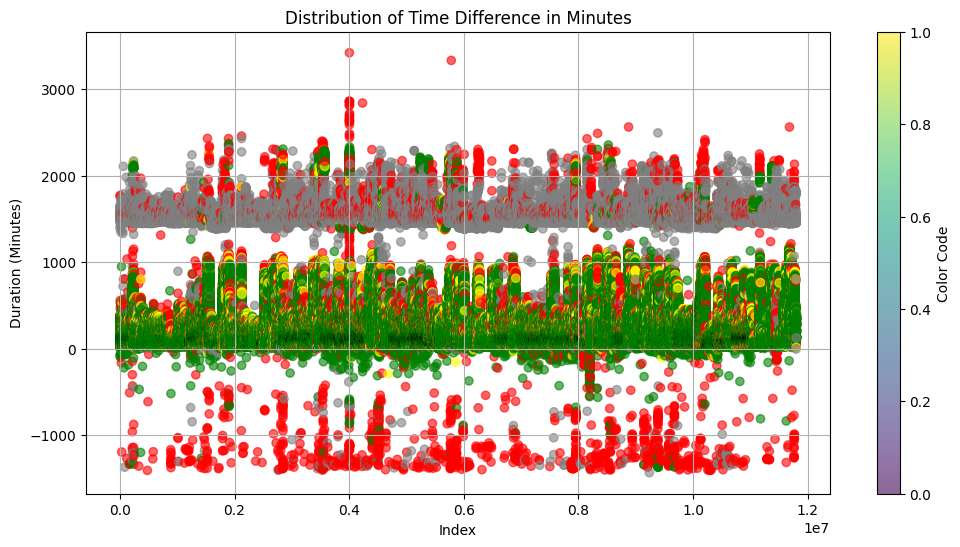

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Ensure the target column is numeric
df['Duration'] = pd.to_numeric(df['Flight Duration'], errors='coerce')

# Create a dummy variable for x-axis
df['Dummy'] = range(len(df))

# Plotting
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Dummy'], df['Duration'], alpha=0.6, c=df['Color Code'], cmap='viridis')
plt.colorbar(scatter, label='Color Code')
plt.title('Distribution of Time Difference in Minutes')
plt.xlabel('Index')
plt.ylabel('Duration (Minutes)')
plt.grid(True)
plt.show()


In [45]:
filtered_df = df[(df['Color Code'] == 'green') & (df['Duration'] > 2000) ]
filtered_df[['STATUS', 'STD','ATD', 'STA', 'ATA', 'STD_UTC','ATD_UTC', 'STA_UTC', 'ATA_UTC','Flight Duration', 'Duration']]

STATUS       STD       ATD       STA       ATA              STD_UTC  \
219000    Landed  14:10:00  00:52:00  06:55:00  17:18:00  2025-01-13 05:10:00   
230014    Landed  01:00:00  01:15:00  20:45:00  20:51:00  2024-12-16 09:00:00   
230026    Landed  00:10:00  00:16:00  20:45:00  18:56:00  2024-12-05 08:10:00   
233401    Landed  01:00:00  01:13:00  20:45:00  20:27:00  2025-01-13 09:00:00   
233434    Landed  01:00:00  01:10:00  20:45:00  20:40:00  2024-12-30 09:00:00   
...          ...       ...       ...       ...       ...                  ...   
11429614  Landed  00:30:00  00:45:00  18:45:00  18:48:00  2024-10-01 07:30:00   
11429874  Landed  00:30:00  00:55:00  18:45:00  18:31:00  2024-04-11 07:30:00   
11429914  Landed  00:50:00  01:06:00  18:50:00  18:20:00  2024-03-14 07:50:00   
11429944  Landed  00:50:00  01:15:00  17:50:00  17:41:00  2024-02-23 07:50:00   
11429953  Landed  00:50:00  01:05:00  17:50:00  17:39:00  2024-02-17 07:50:00   

                     ATD_UTC             STA_UTC             ATA_UTC  \
219000   2025-01-12 15:52:00 2025-01-13 14:55:00 2025-01-14 01:18:00   
230014   2024-12-16 09:15:00 2024-12-17 20:45:00 2024-12-17 20:51:00   
230026   2024-12-05 08:16:00 2024-12-06 20:45:00 2024-12-06 18:56:00   
233401   2025-01-13 09:13:00 2025-01-14 20:45:00 2025-01-14 20:27:00   
233434   2024-12-30 09:10:00 2024-12-31 20:45:00 2024-12-31 20:40:00   
...                      ...                 ...                 ...   
11429614 2024-10-01 07:45:00 2024-10-02 18:45:00 2024-10-02 18:48:00   
11429874 2024-04-11 07:55:00 2024-04-12 18:45:00 2024-04-12 18:31:00   
11429914 2024-03-14 08:06:00 2024-03-15 18:50:00 2024-03-15 18:20:00   
11429944 2024-02-23 08:15:00 2024-02-24 17:50:00 2024-02-24 17:41:00   
11429953 2024-02-17 08:05:00 2024-02-18 17:50:00 2024-02-18 17:39:00   

          Flight Duration  Duration  
219000             2006.0    2006.0  
230014             2136.0    2136.0  
230026             2080.0    2080.0  
233401             2114.0    2114.0  
233434             2130.0    2130.0  
...                   ...       ...  
11429614           2103.0    2103.0  
11429874           2076.0    2076.0  
11429914           2054.0    2054.0  
11429944           2006.0    2006.0  
11429953           2014.0    2014.0  

[2025 rows x 11 columns]

In [46]:
filtered_df

Airline Code Aircraft Registration          Operator Type Code  \
219000         3u-csc                b-308q  Sichuan Airlines      A332   
230014         3u-csc                b-301d  Sichuan Airlines      A359   
230026         3u-csc                b-301d  Sichuan Airlines      A359   
233401         3u-csc                b-325j  Sichuan Airlines      A359   
233434         3u-csc                b-325j  Sichuan Airlines      A359   
...               ...                   ...               ...       ...   
11429614       NH-ANA               JA934A          Air Japan      B789   
11429874       NH-ANA               JA934A          Air Japan      B789   
11429914       NH-ANA               JA934A          Air Japan      B789   
11429944       NH-ANA               JA934A          Air Japan      B789   
11429953       NH-ANA               JA934A          Air Japan      B789   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
219000    7816BE        1406.0        11.0  13 Jan 2025  BUD  TFU  ...   
230014    7814B4          60.0         7.0  17 Dec 2024  TFU  YVR  ...   
230026    7814B4          60.0         7.0  06 Dec 2024  TFU  YVR  ...   
233401    781C2D         550.0         3.0  14 Jan 2025  TFU  YVR  ...   
233434    781C2D         550.0         3.0  31 Dec 2024  TFU  YVR  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11429614  873356       43868.0         4.0  02 Oct 2024  HND  LAX  ...   
11429874  873356       43868.0         4.0  12 Apr 2024  HND  LAX  ...   
11429914  873356       43868.0         4.0  15 Mar 2024  HND  LAX  ...   
11429944  873356       43868.0         4.0  24 Feb 2024  HND  LAX  ...   
11429953  873356       43868.0         4.0  18 Feb 2024  HND  LAX  ...   

         FROM_GMT     TO_LAT      TO_LNG TO_GMT             ATD_UTC  \
219000        1.0  30.312520  104.441284    8.0 2025-01-12 15:52:00   
230014        8.0  49.193901 -123.183998   -8.0 2024-12-16 09:15:00   
230026        8.0  49.193901 -123.183998   -8.0 2024-12-05 08:16:00   
233401        8.0  49.193901 -123.183998   -8.0 2025-01-13 09:13:00   
233434        8.0  49.193901 -123.183998   -8.0 2024-12-30 09:10:00   
...           ...        ...         ...    ...                 ...   
11429614      9.0  33.942501 -118.407997   -8.0 2024-10-01 07:45:00   
11429874      9.0  33.942501 -118.407997   -8.0 2024-04-11 07:55:00   
11429914      9.0  33.942501 -118.407997   -8.0 2024-03-14 08:06:00   
11429944      9.0  33.942501 -118.407997   -8.0 2024-02-23 08:15:00   
11429953      9.0  33.942501 -118.407997   -8.0 2024-02-17 08:05:00   

                     STA_UTC             ATA_UTC Flight Duration Duration  \
219000   2025-01-13 14:55:00 2025-01-14 01:18:00          2006.0   2006.0   
230014   2024-12-17 20:45:00 2024-12-17 20:51:00          2136.0   2136.0   
230026   2024-12-06 20:45:00 2024-12-06 18:56:00          2080.0   2080.0   
233401   2025-01-14 20:45:00 2025-01-14 20:27:00          2114.0   2114.0   
233434   2024-12-31 20:45:00 2024-12-31 20:40:00          2130.0   2130.0   
...                      ...                 ...             ...      ...   
11429614 2024-10-02 18:45:00 2024-10-02 18:48:00          2103.0   2103.0   
11429874 2024-04-12 18:45:00 2024-04-12 18:31:00          2076.0   2076.0   
11429914 2024-03-15 18:50:00 2024-03-15 18:20:00          2054.0   2054.0   
11429944 2024-02-24 17:50:00 2024-02-24 17:41:00          2006.0   2006.0   
11429953 2024-02-18 17:50:00 2024-02-18 17:39:00          2014.0   2014.0   

             Dummy  
219000      219000  
230014      230014  
230026      230026  
233401      233401  
233434      233434  
...            ...  
11429614  11429614  
11429874  11429874  
11429914  11429914  
11429944  11429944  
11429953  11429953  

[2025 rows x 31 columns]

In [47]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

         FROM_GMT     TO_LAT      TO_LNG TO_GMT             ATD_UTC  \
0             6.0  30.312520  104.441284    8.0 2024-08-31 03:53:00   
1             8.0  43.955799   81.330299    6.0 2024-08-30 20:47:00   
2             6.0  30.312520  104.441284    8.0 2024-08-30 17:49:00   
3             8.0  43.907101   87.474197    6.0 2024-08-30 05:12:00   
4             8.0  30.312520  104.441284    8.0 2024-08-29 23:56:00   
...           ...        ...         ...    ...                 ...   
11797410      9.0   1.350190  103.994003    8.0 2024-09-24 20:19:00   
11797411     -5.0  34.858398  136.804993    9.0 2024-09-24 05:34:00   
11797412     -5.0  32.898602  -80.040497   -5.0 2024-09-10 11:24:00   
11797413     -5.0  32.898602  -80.040497   -5.0 2024-09-01 16:05:00   
11797414     -5.0  32.898602  -80.040497   -5.0 2024-08-31 10:23:00   

                     STA_UTC             ATA_UTC Flight Duration Duration  \
0        2024-08-31 05:55:00 2024-08-31 05:48:00           115.0    115.0   
1        2024-08-31 03:00:00 2024-08-31 02:46:00           359.0    359.0   
2        2024-08-30 19:25:00 2024-08-30 18:54:00            65.0     65.0   
3        2024-08-30 08:40:00 2024-08-30 10:21:00           309.0    309.0   
4        2024-08-30 02:05:00 2024-08-30 01:41:00           105.0    105.0   
...                      ...                 ...             ...      ...   
11797410 2024-09-26 02:30:00 2024-09-26 02:30:00          1811.0   1811.0   
11797411 2024-09-24 18:55:00 2024-09-24 18:55:00           801.0    801.0   
11797412 2024-09-10 13:27:00 2024-09-10 13:27:00           123.0    123.0   
11797413 2024-09-01 16:02:00 2024-09-01 16:18:00            13.0     13.0   
11797414 2024-08-31 10:17:00 2024-08-31 10:17:00            -6.0     -6.0   

             Dummy  
0                0  
1                1  
2                2  
3                3  
4                4  
...            ...  
11797410  11797410  
11797411  11797411  
11797412  11797412  
11797413  11797413  
11797414  11797414  

[11797415 rows x 31 columns]

In [55]:
df = df.drop(columns=['FLIGHT TIME(mins)', 'Dummy', 'Duration'])

In [56]:
print(df.dtypes)


Airline Code                     object
Aircraft Registration            object
Operator                         object
Type Code                        object
Mode S                           object
Serial Number                    object
Age(years)                      float64
DATE                             object
FROM                             object
TO                               object
FLIGHT                           object
STD                              object
ATD                              object
STA                              object
Color Code                       object
ATA                              object
STATUS                           object
STD_UTC                          object
FROM_LAT                        float64
FROM_LNG                        float64
FROM_GMT                        float64
TO_LAT                          float64
TO_LNG                          float64
TO_GMT                          float64
ATD_UTC                  datetime64[ns]


In [57]:
df.to_csv('Duration_Updated.csv', index=False)

In [59]:
print(df["STATUS"].unique())

['Landed' 'Unknown' 'Diverted' 'Canceled']


# Getting new Weather Data list

In [6]:
df = pd.read_csv("Duration_Updated.csv")

In [16]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

           FROM_LAT    FROM_LNG FROM_GMT     TO_LAT      TO_LNG TO_GMT  \
0         43.955799   81.330299      6.0  30.312520  104.441284    8.0   
1         30.312520  104.441284      8.0  43.955799   81.330299    6.0   
2         43.907101   87.474197      6.0  30.312520  104.441284    8.0   
3         30.312520  104.441284      8.0  43.907101   87.474197    6.0   
4         21.481667  110.590278      8.0  30.312520  104.441284    8.0   
...             ...         ...      ...        ...         ...    ...   
11797410  34.858398  136.804993      9.0   1.350190  103.994003    8.0   
11797411  32.898602  -80.040497     -5.0  34.858398  136.804993    9.0   
11797412  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   
11797413  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   
11797414  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   

                      ATD_UTC              STA_UTC              ATA_UTC  \
0         2024-08-31 03:53:00  2024-08-31 05:55:00  2024-08-31 05:48:00   
1         2024-08-30 20:47:00  2024-08-31 03:00:00  2024-08-31 02:46:00   
2         2024-08-30 17:49:00  2024-08-30 19:25:00  2024-08-30 18:54:00   
3         2024-08-30 05:12:00  2024-08-30 08:40:00  2024-08-30 10:21:00   
4         2024-08-29 23:56:00  2024-08-30 02:05:00  2024-08-30 01:41:00   
...                       ...                  ...                  ...   
11797410  2024-09-24 20:19:00  2024-09-26 02:30:00  2024-09-26 02:30:00   
11797411  2024-09-24 05:34:00  2024-09-24 18:55:00  2024-09-24 18:55:00   
11797412  2024-09-10 11:24:00  2024-09-10 13:27:00  2024-09-10 13:27:00   
11797413  2024-09-01 16:05:00  2024-09-01 16:02:00  2024-09-01 16:18:00   
11797414  2024-08-31 10:23:00  2024-08-31 10:17:00  2024-08-31 10:17:00   

          Flight Duration  
0                   115.0  
1                   359.0  
2                    65.0  
3                   309.0  
4                   105.0  
...                   ...  
11797410           1811.0  
11797411            801.0  
11797412            123.0  
11797413             13.0  
11797414             -6.0  

[11797415 rows x 28 columns]

In [17]:
unique_destinations = pd.unique(df[['TO', 'FROM']].values.ravel('K'))

In [18]:
unique_destinations_list = list(unique_destinations)
print(unique_destinations_list)

['TFU', 'YIN', 'URC', 'ZHA', 'AKU', 'AAT', nan, 'KRL', 'KHG', 'DSN', 'KOW', 'LLV', 'KCA', 'YNZ', 'XUZ', 'INC', 'YBP', 'SWA', 'YLX', 'WNZ', 'DNH', 'WUH', 'TSN', 'DLU', 'DZH', 'HSN', 'XNN', 'WUS', 'XIY', 'YNT', 'TNA', 'HRB', 'HAK', 'PVG', 'NKG', 'KMG', 'BHY', 'CGO', 'JHG', 'CTU', 'HFE', 'CZX', 'WUX', 'NGB', 'SHE', 'CAN', 'HGH', 'MIG', 'ZAT', 'LHW', 'JGN', 'SYX', 'CKG', 'SZX', 'HKT', 'DLC', 'PEK', 'NNG', 'LYG', 'TAO', 'KWL', 'LUM', 'VTE', 'KRY', 'ZUH', 'LZO', 'GYS', 'FOC', 'XMN', 'SJW', 'LFQ', 'TYN', 'LJG', 'HDG', 'KHN', 'HUZ', 'JJN', 'YIW', 'WHA', 'CGQ', 'BAR', 'CSX', 'WNH', 'LCX', 'LZH', 'YIC', 'WDS', 'HAN', 'WXN', 'HET', 'WEH', 'YTY', 'HKG', 'SYM', 'RIZ', 'BPL', 'CGD', 'ACX', 'DDG', 'TEN', 'CXR', 'SGN', 'NTG', 'XIC', 'ZHY', 'CGK', 'CNX', 'BKK', 'KIX', 'SIN', 'KUL', 'NRT', 'TSA', 'DYG', 'CJJ', 'MWX', 'TAE', 'KWE', 'ICN', 'MLE', 'HLD', 'LZY', 'LXA', 'PZI', 'DCY', 'TCZ', 'KTM', 'KGT', 'GXH', 'JZH', 'GZG', 'DIG', 'AOG', 'BZX', 'NAO', 'PHH', 'AHJ', 'DEL', 'LZG', 'YNJ', 'BLR', 'YIH', 'HYN', 

In [19]:
df_airports = pd.read_csv('IATA_TIMEZONE.csv')

In [20]:
df_airports

IATA                                          NAME        LAT  \
0     AAA                                  Anaa Airport -17.352600   
1     AAB                              Arrabury Airport -26.696390   
2     AAC                El Arish International Airport  31.078565   
3     AAD                                 Adado Airport   6.095802   
4     AAE                    Annaba Rabah Bitat Airport  36.826781   
...   ...                                           ...        ...   
9144  QNA    Denver Colorado Air and Space Port Airport  39.790216   
9145  QTD                    Dyersburg Regional Airport  35.999667   
9146  PFN  Panama City–Bay County International Airport  30.355030   
9147  NHA                                     Nha Trang  12.007481   
9148  QCW                                 Worms Airport  49.606034   

             LNG            TIMEZONE   GMT  
0    -145.509995      Pacific/Tahiti -10.0  
1     141.048718  Australia/Brisbane  10.0  
2      33.836791        Africa/Cairo   2.0  
3      46.637500    Africa/Mogadishu   3.0  
4       7.813340      Africa/Algiers   1.0  
...          ...                 ...   ...  
9144 -104.549740      America/Denver  -7.0  
9145  -89.401883     America/Chicago  -6.0  
9146  -85.799213     America/Chicago  -6.0  
9147  109.220372    Asia/Ho_Chi_Minh   7.0  
9148    8.367853       Europe/Berlin   1.0  

[9149 rows x 6 columns]

In [21]:
df_filtered = df_airports[df_airports['IATA'].isin(unique_destinations_list)]

In [23]:
df_filtered

IATA                                               NAME        LAT  \
2     AAC                     El Arish International Airport  31.078565   
11    AAL                                    Aalborg Airport  57.094763   
13    AAN                       Al Ain International Airport  24.261700   
15    AAP  Aji Pangeran Tumenggung Pranoto International ...  -0.374478   
17    AAR                                     Aarhus Airport  56.303331   
...   ...                                                ...        ...   
9144  QNA         Denver Colorado Air and Space Port Airport  39.790216   
9145  QTD                         Dyersburg Regional Airport  35.999667   
9146  PFN       Panama City–Bay County International Airport  30.355030   
9147  NHA                                          Nha Trang  12.007481   
9148  QCW                                      Worms Airport  49.606034   

             LNG           TIMEZONE  GMT  
2      33.836791       Africa/Cairo  2.0  
11      9.849930  Europe/Copenhagen  1.0  
13     55.609200         Asia/Dubai  4.0  
15    117.250128      Asia/Makassar  8.0  
17     10.618286  Europe/Copenhagen  1.0  
...          ...                ...  ...  
9144 -104.549740     America/Denver -7.0  
9145  -89.401883    America/Chicago -6.0  
9146  -85.799213    America/Chicago -6.0  
9147  109.220372   Asia/Ho_Chi_Minh  7.0  
9148    8.367853      Europe/Berlin  1.0  

[2016 rows x 6 columns]

In [24]:
import pandas as pd
from datetime import datetime
from meteostat import Hourly, Stations
import os

# Load your DataFrame here, e.g., df = pd.read_csv('your_file.csv')
# Assuming df is already loaded with the necessary columns

# Define the function to fetch and save weather data
def fetch_weather_data(iata, lat, lng, start_date, end_date):
    # Convert start and end dates to datetime if they are not already
    if not isinstance(start_date, datetime):
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
    if not isinstance(end_date, datetime):
        end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Ensure the Weather directory exists
    weather_dir = 'Weather'
    os.makedirs(weather_dir, exist_ok=True)

    # Find the nearest weather station
    stations = Stations()
    nearest_station = stations.nearby(lat, lng).fetch(1)
    if nearest_station.empty:
        print(f"No nearby station found for {iata}.")
        return None

    station_id = nearest_station.index[0]

    # Get hourly data for the nearest station
    data = Hourly(station_id, start_date, end_date)
    data = data.fetch()

    # Construct file path for CSV
    filepath = os.path.join(weather_dir, f"{iata}_weather.csv")

    # Save the data to a CSV file
    data.to_csv(filepath)
    print(f"Data saved to {filepath}")

    return data


In [25]:
# Iterate over each row of the DataFrame to fetch and save weather data
# Set the time period for all data fetches
start = '2024-01-01'
end = datetime.now().strftime('%Y-%m-%d')
#for index, row in df_airports.iterrows():
for index, row in df_filtered.iterrows():
    fetch_weather_data(row['IATA'], row['LAT'], row['LNG'], start, end)

Data saved to Weather\AAC_weather.csv
Data saved to Weather\AAL_weather.csv
Data saved to Weather\AAN_weather.csv
Data saved to Weather\AAP_weather.csv
Data saved to Weather\AAR_weather.csv
Data saved to Weather\AAT_weather.csv
Data saved to Weather\AAV_weather.csv
Data saved to Weather\ABE_weather.csv
Data saved to Weather\ABJ_weather.csv
Data saved to Weather\ABK_weather.csv
Data saved to Weather\ABQ_weather.csv
Data saved to Weather\ABT_weather.csv
Data saved to Weather\ABU_weather.csv
Data saved to Weather\ABV_weather.csv
Data saved to Weather\ABZ_weather.csv
Data saved to Weather\ACA_weather.csv
Data saved to Weather\ACC_weather.csv
Data saved to Weather\ACE_weather.csv
Data saved to Weather\ACF_weather.csv
Data saved to Weather\ACH_weather.csv
Data saved to Weather\ACK_weather.csv
Data saved to Weather\ACT_weather.csv
Data saved to Weather\ACV_weather.csv
Data saved to Weather\ACX_weather.csv
Data saved to Weather\ACY_weather.csv
Data saved to Weather\ADA_weather.csv
Data saved t

Data saved to Weather\KNH_weather.csv


Data saved to Weather\KNO_weather.csv


Data saved to Weather\KNU_weather.csv


Data saved to Weather\KOA_weather.csv


Data saved to Weather\KOE_weather.csv


Data saved to Weather\KOJ_weather.csv


Data saved to Weather\KOK_weather.csv
Data saved to Weather\KOM_weather.csv


Data saved to Weather\KOP_weather.csv
Data saved to Weather\KOS_weather.csv
Data saved to Weather\KOW_weather.csv
Data saved to Weather\KPM_weather.csv


Data saved to Weather\KRK_weather.csv


Data saved to Weather\KRL_weather.csv


Data saved to Weather\KRS_weather.csv


Data saved to Weather\KRT_weather.csv


Data saved to Weather\KRY_weather.csv


Data saved to Weather\KSA_weather.csv


Data saved to Weather\KSC_weather.csv


Data saved to Weather\KSF_weather.csv


Data saved to Weather\KSW_weather.csv


Data saved to Weather\KSY_weather.csv


Data saved to Weather\KTA_weather.csv


Data saved to Weather\KTM_weather.csv


Data saved to Weather\KTR_weather.csv


Data saved to Weather\KTT_weather.csv


Data saved to Weather\KTW_weather.csv


Data saved to Weather\KUA_weather.csv


Data saved to Weather\KUF_weather.csv


Data saved to Weather\KUH_weather.csv


Data saved to Weather\KUL_weather.csv


Data saved to Weather\KUN_weather.csv


Data saved to Weather\KUO_weather.csv
Data saved to Weather\KVG_weather.csv
Data saved to Weather\KWA_weather.csv
Data saved to Weather\KWE_weather.csv


Data saved to Weather\KWI_weather.csv


Data saved to Weather\KWJ_weather.csv


Data saved to Weather\KWL_weather.csv
Data saved to Weather\KXF_weather.csv


Data saved to Weather\KYA_weather.csv


Data saved to Weather\KYP_weather.csv


Data saved to Weather\KZN_weather.csv


Data saved to Weather\KZR_weather.csv


Data saved to Weather\LAD_weather.csv
Data saved to Weather\LAE_weather.csv


Data saved to Weather\LAF_weather.csv


Data saved to Weather\LAN_weather.csv


Data saved to Weather\LAO_weather.csv


Data saved to Weather\LAR_weather.csv


Data saved to Weather\LAS_weather.csv


Data saved to Weather\LAX_weather.csv


Data saved to Weather\LBA_weather.csv


Data saved to Weather\LBB_weather.csv


Data saved to Weather\LBC_weather.csv


Data saved to Weather\LBD_weather.csv


Data saved to Weather\LBF_weather.csv


Data saved to Weather\LBG_weather.csv


Data saved to Weather\LBJ_weather.csv


Data saved to Weather\LBL_weather.csv


Data saved to Weather\LBS_weather.csv


Data saved to Weather\LBU_weather.csv


Data saved to Weather\LBV_weather.csv


Data saved to Weather\LCA_weather.csv
Data saved to Weather\LCH_weather.csv


Data saved to Weather\LCK_weather.csv


Data saved to Weather\LCQ_weather.csv


Data saved to Weather\LCX_weather.csv


Data saved to Weather\LCY_weather.csv


Data saved to Weather\LDE_weather.csv
Data saved to Weather\LDJ_weather.csv


Data saved to Weather\LDS_weather.csv


Data saved to Weather\LDY_weather.csv


Data saved to Weather\LED_weather.csv


Data saved to Weather\LEI_weather.csv


Data saved to Weather\LEJ_weather.csv


Data saved to Weather\LEX_weather.csv


Data saved to Weather\LEY_weather.csv


Data saved to Weather\LFQ_weather.csv


Data saved to Weather\LFT_weather.csv


Data saved to Weather\LFW_weather.csv
Data saved to Weather\LGA_weather.csv


Data saved to Weather\LGB_weather.csv


Data saved to Weather\LGG_weather.csv


Data saved to Weather\LGK_weather.csv


Data saved to Weather\LGW_weather.csv


Data saved to Weather\LGZ_weather.csv


Data saved to Weather\LHE_weather.csv


Data saved to Weather\LHR_weather.csv


Data saved to Weather\LHW_weather.csv


Data saved to Weather\LIG_weather.csv


Data saved to Weather\LIH_weather.csv
Data saved to Weather\LIL_weather.csv


Data saved to Weather\LIM_weather.csv


Data saved to Weather\LIN_weather.csv
Data saved to Weather\LIR_weather.csv


Data saved to Weather\LIS_weather.csv


Data saved to Weather\LIT_weather.csv
Data saved to Weather\LJG_weather.csv


Data saved to Weather\LJU_weather.csv


Data saved to Weather\LKB_weather.csv


Data saved to Weather\LKO_weather.csv
Data saved to Weather\LLB_weather.csv
Data saved to Weather\LLI_weather.csv


Data saved to Weather\LLJ_weather.csv
Data saved to Weather\LLV_weather.csv


Data saved to Weather\LLW_weather.csv


Data saved to Weather\LLY_weather.csv


Data saved to Weather\LNJ_weather.csv


Data saved to Weather\LNK_weather.csv


Data saved to Weather\LNL_weather.csv
Data saved to Weather\LNV_weather.csv


Data saved to Weather\LNZ_weather.csv


Data saved to Weather\LOE_weather.csv


Data saved to Weather\LOP_weather.csv


Data saved to Weather\LOS_weather.csv


Data saved to Weather\LPA_weather.csv
Data saved to Weather\LPF_weather.csv


Data saved to Weather\LPI_weather.csv
Data saved to Weather\LPL_weather.csv


Data saved to Weather\LPP_weather.csv


Data saved to Weather\LPQ_weather.csv


Data saved to Weather\LPT_weather.csv


Data saved to Weather\LRD_weather.csv


Data saved to Weather\LRL_weather.csv


Data saved to Weather\LRM_weather.csv


Data saved to Weather\LRU_weather.csv


Data saved to Weather\LSE_weather.csv


Data saved to Weather\LSH_weather.csv


Data saved to Weather\LST_weather.csv


Data saved to Weather\LSV_weather.csv


Data saved to Weather\LTK_weather.csv


Data saved to Weather\LTN_weather.csv


Data saved to Weather\LTQ_weather.csv


Data saved to Weather\LUK_weather.csv
Data saved to Weather\LUM_weather.csv


Data saved to Weather\LUN_weather.csv


Data saved to Weather\LUW_weather.csv


Data saved to Weather\LUX_weather.csv


Data saved to Weather\LWB_weather.csv


Data saved to Weather\LWS_weather.csv
Data saved to Weather\LXA_weather.csv


Data saved to Weather\LXR_weather.csv


Data saved to Weather\LYA_weather.csv
Data saved to Weather\LYG_weather.csv
Data saved to Weather\LYI_weather.csv


Data saved to Weather\LYP_weather.csv


Data saved to Weather\LYS_weather.csv
Data saved to Weather\LZG_weather.csv


Data saved to Weather\LZH_weather.csv
Data saved to Weather\LZN_weather.csv


Data saved to Weather\LZO_weather.csv
Data saved to Weather\LZY_weather.csv


Data saved to Weather\MAA_weather.csv


Data saved to Weather\MAD_weather.csv


Data saved to Weather\MAF_weather.csv
Data saved to Weather\MAG_weather.csv


Data saved to Weather\MAH_weather.csv
Data saved to Weather\MAJ_weather.csv


Data saved to Weather\MAN_weather.csv


Data saved to Weather\MAO_weather.csv


Data saved to Weather\MAQ_weather.csv


Data saved to Weather\MAS_weather.csv
Data saved to Weather\MBA_weather.csv


Data saved to Weather\MBE_weather.csv


Data saved to Weather\MBJ_weather.csv


Data saved to Weather\MBO_weather.csv


Data saved to Weather\MBS_weather.csv


Data saved to Weather\MBT_weather.csv


Data saved to Weather\MBX_weather.csv


Data saved to Weather\MCI_weather.csv


Data saved to Weather\MCN_weather.csv


Data saved to Weather\MCO_weather.csv


Data saved to Weather\MCT_weather.csv


Data saved to Weather\MCW_weather.csv


Data saved to Weather\MCY_weather.csv
Data saved to Weather\MDC_weather.csv


Data saved to Weather\MDE_weather.csv


Data saved to Weather\MDG_weather.csv
Data saved to Weather\MDL_weather.csv


Data saved to Weather\MDT_weather.csv


Data saved to Weather\MDW_weather.csv


Data saved to Weather\MEB_weather.csv


Data saved to Weather\MED_weather.csv


Data saved to Weather\MEI_weather.csv


Data saved to Weather\MEL_weather.csv


Data saved to Weather\MEM_weather.csv


Data saved to Weather\MEX_weather.csv


Data saved to Weather\MFE_weather.csv
Data saved to Weather\MFK_weather.csv


Data saved to Weather\MFM_weather.csv
Data saved to Weather\MFR_weather.csv


Data saved to Weather\MGA_weather.csv


Data saved to Weather\MGL_weather.csv


Data saved to Weather\MGQ_weather.csv


Data saved to Weather\MGW_weather.csv


Data saved to Weather\MGZ_weather.csv


Data saved to Weather\MHD_weather.csv


Data saved to Weather\MHK_weather.csv


Data saved to Weather\MHQ_weather.csv


Data saved to Weather\MHT_weather.csv


Data saved to Weather\MHZ_weather.csv


Data saved to Weather\MIA_weather.csv


Data saved to Weather\MID_weather.csv
Data saved to Weather\MIG_weather.csv


Data saved to Weather\MIR_weather.csv


Data saved to Weather\MJI_weather.csv


Data saved to Weather\MJU_weather.csv


Data saved to Weather\MKC_weather.csv


Data saved to Weather\MKE_weather.csv
Data saved to Weather\MKQ_weather.csv
Data saved to Weather\MKW_weather.csv


Data saved to Weather\MKY_weather.csv
Data saved to Weather\MKZ_weather.csv


Data saved to Weather\MLA_weather.csv


Data saved to Weather\MLB_weather.csv
Data saved to Weather\MLE_weather.csv


Data saved to Weather\MLG_weather.csv
Data saved to Weather\MLI_weather.csv


Data saved to Weather\MLM_weather.csv


Data saved to Weather\MLU_weather.csv


Data saved to Weather\MLX_weather.csv


Data saved to Weather\MMB_weather.csv


Data saved to Weather\MME_weather.csv


Data saved to Weather\MMU_weather.csv


Data saved to Weather\MMX_weather.csv


Data saved to Weather\MMY_weather.csv


Data saved to Weather\MNL_weather.csv


Data saved to Weather\MOB_weather.csv
Data saved to Weather\MOE_weather.csv


Data saved to Weather\MOT_weather.csv
Data saved to Weather\MPH_weather.csv


Data saved to Weather\MPL_weather.csv
Data saved to Weather\MPM_weather.csv


Data saved to Weather\MQM_weather.csv
Data saved to Weather\MQP_weather.csv


Data saved to Weather\MQX_weather.csv


Data saved to Weather\MRA_weather.csv


Data saved to Weather\MRQ_weather.csv


Data saved to Weather\MRS_weather.csv


Data saved to Weather\MRU_weather.csv


Data saved to Weather\MRY_weather.csv


Data saved to Weather\MSJ_weather.csv


Data saved to Weather\MSN_weather.csv
Data saved to Weather\MSO_weather.csv


Data saved to Weather\MSP_weather.csv


Data saved to Weather\MSQ_weather.csv


Data saved to Weather\MSR_weather.csv


Data saved to Weather\MST_weather.csv


Data saved to Weather\MSY_weather.csv


Data saved to Weather\MTJ_weather.csv


Data saved to Weather\MTY_weather.csv


Data saved to Weather\MUB_weather.csv


Data saved to Weather\MUC_weather.csv


Data saved to Weather\MUX_weather.csv


Data saved to Weather\MVD_weather.csv


Data saved to Weather\MWH_weather.csv


Data saved to Weather\MWS_weather.csv


Data saved to Weather\MWX_weather.csv
Data saved to Weather\MXH_weather.csv


Data saved to Weather\MXP_weather.csv


Data saved to Weather\MXS_weather.csv


Data saved to Weather\MXZ_weather.csv


Data saved to Weather\MYJ_weather.csv


Data saved to Weather\MYQ_weather.csv


Data saved to Weather\MYR_weather.csv


Data saved to Weather\MYT_weather.csv


Data saved to Weather\MYY_weather.csv


Data saved to Weather\MZG_weather.csv


Data saved to Weather\MZH_weather.csv


Data saved to Weather\MZJ_weather.csv


Data saved to Weather\MZS_weather.csv


Data saved to Weather\MZT_weather.csv


Data saved to Weather\NAG_weather.csv
Data saved to Weather\NAJ_weather.csv


Data saved to Weather\NAK_weather.csv
Data saved to Weather\NAN_weather.csv
Data saved to Weather\NAO_weather.csv


Data saved to Weather\NAP_weather.csv
Data saved to Weather\NAS_weather.csv


Data saved to Weather\NAV_weather.csv


Data saved to Weather\NAW_weather.csv


Data saved to Weather\NBE_weather.csv
Data saved to Weather\NBJ_weather.csv


Data saved to Weather\NBO_weather.csv


Data saved to Weather\NBS_weather.csv


Data saved to Weather\NBW_weather.csv


Data saved to Weather\NCE_weather.csv


Data saved to Weather\NCL_weather.csv


Data saved to Weather\NCY_weather.csv


Data saved to Weather\NDG_weather.csv


Data saved to Weather\NDJ_weather.csv


Data saved to Weather\NEK_weather.csv


Data saved to Weather\NEW_weather.csv


Data saved to Weather\NGB_weather.csv


Data saved to Weather\NGO_weather.csv


Data saved to Weather\NGQ_weather.csv


Data saved to Weather\NGS_weather.csv
Data saved to Weather\NHD_weather.csv


Data saved to Weather\NHT_weather.csv


Data saved to Weather\NIM_weather.csv


Data saved to Weather\NIP_weather.csv


Data saved to Weather\NJF_weather.csv


Data saved to Weather\NKC_weather.csv


Data saved to Weather\NKG_weather.csv


Data saved to Weather\NKM_weather.csv


Data saved to Weather\NKT_weather.csv
Data saved to Weather\NLA_weather.csv
Data saved to Weather\NLH_weather.csv


Data saved to Weather\NLK_weather.csv


Data saved to Weather\NLT_weather.csv


Data saved to Weather\NLU_weather.csv


Data saved to Weather\NNG_weather.csv


Data saved to Weather\NNT_weather.csv


Data saved to Weather\NNY_weather.csv


Data saved to Weather\NOC_weather.csv


Data saved to Weather\NOP_weather.csv
Data saved to Weather\NOS_weather.csv


Data saved to Weather\NOU_weather.csv


Data saved to Weather\NPE_weather.csv


Data saved to Weather\NPL_weather.csv


Data saved to Weather\NQA_weather.csv


Data saved to Weather\NQY_weather.csv


Data saved to Weather\NQZ_weather.csv


Data saved to Weather\NRN_weather.csv


Data saved to Weather\NRT_weather.csv


Data saved to Weather\NSI_weather.csv


Data saved to Weather\NSN_weather.csv


Data saved to Weather\NST_weather.csv


Data saved to Weather\NTE_weather.csv


Data saved to Weather\NTG_weather.csv


Data saved to Weather\NTL_weather.csv


Data saved to Weather\NTQ_weather.csv


Data saved to Weather\NUE_weather.csv


Data saved to Weather\NUM_weather.csv


Data saved to Weather\NVI_weather.csv


Data saved to Weather\NWI_weather.csv


Data saved to Weather\NYT_weather.csv
Data saved to Weather\NYU_weather.csv


Data saved to Weather\NZH_weather.csv
Data saved to Weather\NZL_weather.csv


Data saved to Weather\OAK_weather.csv


Data saved to Weather\OAX_weather.csv


Data saved to Weather\OBE_weather.csv


Data saved to Weather\OBF_weather.csv


Data saved to Weather\OBO_weather.csv


Data saved to Weather\OCH_weather.csv


Data saved to Weather\ODE_weather.csv
Data saved to Weather\OEC_weather.csv


Data saved to Weather\OGG_weather.csv


Data saved to Weather\OGU_weather.csv


Data saved to Weather\OGX_weather.csv


Data saved to Weather\OHE_weather.csv


Data saved to Weather\OHS_weather.csv


Data saved to Weather\OIT_weather.csv
Data saved to Weather\OKA_weather.csv


Data saved to Weather\OKC_weather.csv


Data saved to Weather\OKD_weather.csv


Data saved to Weather\OKI_weather.csv


Data saved to Weather\OKJ_weather.csv


Data saved to Weather\OLB_weather.csv


Data saved to Weather\OLV_weather.csv


Data saved to Weather\OMA_weather.csv


Data saved to Weather\OMH_weather.csv


Data saved to Weather\ONJ_weather.csv


Data saved to Weather\ONQ_weather.csv


Data saved to Weather\ONT_weather.csv


Data saved to Weather\OOL_weather.csv


Data saved to Weather\OPF_weather.csv


Data saved to Weather\OPO_weather.csv


Data saved to Weather\ORB_weather.csv


Data saved to Weather\ORD_weather.csv


Data saved to Weather\ORF_weather.csv


Data saved to Weather\ORK_weather.csv


Data saved to Weather\ORN_weather.csv


Data saved to Weather\ORY_weather.csv


Data saved to Weather\OSD_weather.csv


Data saved to Weather\OSF_weather.csv


Data saved to Weather\OSI_weather.csv


Data saved to Weather\OSL_weather.csv


Data saved to Weather\OSN_weather.csv


Data saved to Weather\OSR_weather.csv


Data saved to Weather\OST_weather.csv
Data saved to Weather\OTH_weather.csv


Data saved to Weather\OTP_weather.csv


Data saved to Weather\OUA_weather.csv


Data saved to Weather\OUL_weather.csv


Data saved to Weather\OVB_weather.csv


Data saved to Weather\OVD_weather.csv
Data saved to Weather\OZC_weather.csv


Data saved to Weather\PAD_weather.csv
Data saved to Weather\PAE_weather.csv
Data saved to Weather\PAG_weather.csv


Data saved to Weather\PAT_weather.csv


Data saved to Weather\PBC_weather.csv


Data saved to Weather\PBI_weather.csv


Data saved to Weather\PBM_weather.csv


Data saved to Weather\PBU_weather.csv


Data saved to Weather\PDG_weather.csv


Data saved to Weather\PDL_weather.csv


Data saved to Weather\PDV_weather.csv


Data saved to Weather\PDX_weather.csv


Data saved to Weather\PEG_weather.csv


Data saved to Weather\PEK_weather.csv
Data saved to Weather\PEN_weather.csv


Data saved to Weather\PER_weather.csv


Data saved to Weather\PEW_weather.csv


Data saved to Weather\PFO_weather.csv


Data saved to Weather\PGF_weather.csv


Data saved to Weather\PGH_weather.csv


Data saved to Weather\PGK_weather.csv
Data saved to Weather\PHA_weather.csv


Data saved to Weather\PHC_weather.csv
Data saved to Weather\PHE_weather.csv


Data saved to Weather\PHL_weather.csv


Data saved to Weather\PHS_weather.csv


Data saved to Weather\PHX_weather.csv


Data saved to Weather\PIA_weather.csv


Data saved to Weather\PIB_weather.csv


Data saved to Weather\PIE_weather.csv


Data saved to Weather\PIK_weather.csv


Data saved to Weather\PIT_weather.csv
Data saved to Weather\PKN_weather.csv
Data saved to Weather\PKR_weather.csv


Data saved to Weather\PKU_weather.csv
Data saved to Weather\PKX_weather.csv


Data saved to Weather\PKY_weather.csv


Data saved to Weather\PLL_weather.csv


Data saved to Weather\PLM_weather.csv


Data saved to Weather\PLS_weather.csv


Data saved to Weather\PLW_weather.csv


Data saved to Weather\PMF_weather.csv


Data saved to Weather\PMI_weather.csv


Data saved to Weather\PMO_weather.csv


Data saved to Weather\PMR_weather.csv


Data saved to Weather\PNH_weather.csv


Data saved to Weather\PNI_weather.csv


Data saved to Weather\PNK_weather.csv
Data saved to Weather\PNP_weather.csv


Data saved to Weather\PNQ_weather.csv


Data saved to Weather\PNR_weather.csv


Data saved to Weather\PNS_weather.csv


Data saved to Weather\PNY_weather.csv
Data saved to Weather\POM_weather.csv


Data saved to Weather\POP_weather.csv


Data saved to Weather\POS_weather.csv


Data saved to Weather\POX_weather.csv


Data saved to Weather\POZ_weather.csv


Data saved to Weather\PPP_weather.csv


Data saved to Weather\PPS_weather.csv


Data saved to Weather\PPT_weather.csv


Data saved to Weather\PQC_weather.csv


Data saved to Weather\PQI_weather.csv
Data saved to Weather\PRC_weather.csv


Data saved to Weather\PRG_weather.csv


Data saved to Weather\PRH_weather.csv


Data saved to Weather\PRN_weather.csv


Data saved to Weather\PSA_weather.csv


Data saved to Weather\PSC_weather.csv


Data saved to Weather\PSP_weather.csv


Data saved to Weather\PTK_weather.csv
Data saved to Weather\PTP_weather.csv
Data saved to Weather\PTY_weather.csv


Data saved to Weather\PUB_weather.csv


Data saved to Weather\PUF_weather.csv


Data saved to Weather\PUJ_weather.csv
Data saved to Weather\PUS_weather.csv


Data saved to Weather\PUY_weather.csv


Data saved to Weather\PVD_weather.csv


Data saved to Weather\PVG_weather.csv


Data saved to Weather\PVK_weather.csv


Data saved to Weather\PVR_weather.csv


Data saved to Weather\PVU_weather.csv


Data saved to Weather\PWK_weather.csv


Data saved to Weather\PWM_weather.csv


Data saved to Weather\PXO_weather.csv


Data saved to Weather\PXU_weather.csv


Data saved to Weather\PZI_weather.csv


Data saved to Weather\PZU_weather.csv


Data saved to Weather\QHU_weather.csv


Data saved to Weather\QPG_weather.csv
Data saved to Weather\QRO_weather.csv


Data saved to Weather\QSZ_weather.csv
Data saved to Weather\QUG_weather.csv
Data saved to Weather\RAB_weather.csv


Data saved to Weather\RAE_weather.csv


Data saved to Weather\RAH_weather.csv
Data saved to Weather\RAJ_weather.csv


Data saved to Weather\RAK_weather.csv


Data saved to Weather\RAP_weather.csv


Data saved to Weather\RAR_weather.csv


Data saved to Weather\RBA_weather.csv


Data saved to Weather\RCS_weather.csv
Data saved to Weather\RDD_weather.csv


Data saved to Weather\RDM_weather.csv


Data saved to Weather\RDP_weather.csv


Data saved to Weather\RDU_weather.csv


Data saved to Weather\REC_weather.csv


Data saved to Weather\REU_weather.csv


Data saved to Weather\RFD_weather.csv


Data saved to Weather\RGN_weather.csv


Data saved to Weather\RHI_weather.csv


Data saved to Weather\RHO_weather.csv


Data saved to Weather\RIC_weather.csv


Data saved to Weather\RIS_weather.csv


Data saved to Weather\RIV_weather.csv


Data saved to Weather\RIW_weather.csv


Data saved to Weather\RIX_weather.csv
Data saved to Weather\RIZ_weather.csv


Data saved to Weather\RJA_weather.csv


Data saved to Weather\RJH_weather.csv


Data saved to Weather\RJK_weather.csv


Data saved to Weather\RKE_weather.csv


Data saved to Weather\RKS_weather.csv


Data saved to Weather\RKT_weather.csv


Data saved to Weather\RKZ_weather.csv


Data saved to Weather\RLG_weather.csv


Data saved to Weather\RLK_weather.csv


Data saved to Weather\RMI_weather.csv
Data saved to Weather\RMN_weather.csv


Data saved to Weather\RMO_weather.csv


Data saved to Weather\RMQ_weather.csv


Data saved to Weather\RNJ_weather.csv


Data saved to Weather\RNO_weather.csv


Data saved to Weather\RNS_weather.csv


Data saved to Weather\RNT_weather.csv


Data saved to Weather\ROA_weather.csv


Data saved to Weather\ROB_weather.csv


Data saved to Weather\ROC_weather.csv


Data saved to Weather\ROI_weather.csv


Data saved to Weather\ROK_weather.csv


Data saved to Weather\ROR_weather.csv


Data saved to Weather\ROS_weather.csv


Data saved to Weather\ROT_weather.csv


Data saved to Weather\ROW_weather.csv


Data saved to Weather\RPR_weather.csv


Data saved to Weather\RQA_weather.csv


Data saved to Weather\RQY_weather.csv
Data saved to Weather\RRR_weather.csv
Data saved to Weather\RSI_weather.csv


Data saved to Weather\RST_weather.csv


Data saved to Weather\RSU_weather.csv


Data saved to Weather\RSW_weather.csv


Data saved to Weather\RTA_weather.csv


Data saved to Weather\RTB_weather.csv


Data saved to Weather\RTM_weather.csv
Data saved to Weather\RUG_weather.csv


Data saved to Weather\RUH_weather.csv


Data saved to Weather\RUN_weather.csv


Data saved to Weather\RVN_weather.csv
Data saved to Weather\RXS_weather.csv


Data saved to Weather\RYK_weather.csv


Data saved to Weather\RZE_weather.csv


Data saved to Weather\RZV_weather.csv


Data saved to Weather\SAF_weather.csv
Data saved to Weather\SAG_weather.csv
Data saved to Weather\SAI_weather.csv


Data saved to Weather\SAL_weather.csv


Data saved to Weather\SAN_weather.csv


Data saved to Weather\SAP_weather.csv


Data saved to Weather\SAT_weather.csv


Data saved to Weather\SAV_weather.csv


Data saved to Weather\SAW_weather.csv


Data saved to Weather\SBA_weather.csv


Data saved to Weather\SBD_weather.csv


Data saved to Weather\SBN_weather.csv


Data saved to Weather\SBP_weather.csv


Data saved to Weather\SBW_weather.csv


Data saved to Weather\SBZ_weather.csv


Data saved to Weather\SCE_weather.csv


Data saved to Weather\SCL_weather.csv


Data saved to Weather\SCN_weather.csv


Data saved to Weather\SCO_weather.csv


Data saved to Weather\SCQ_weather.csv


Data saved to Weather\SCV_weather.csv


Data saved to Weather\SDF_weather.csv


Data saved to Weather\SDJ_weather.csv
Data saved to Weather\SDK_weather.csv


Data saved to Weather\SDQ_weather.csv


Data saved to Weather\SEA_weather.csv
Data saved to Weather\SEN_weather.csv
Data saved to Weather\SEZ_weather.csv


Data saved to Weather\SFA_weather.csv


Data saved to Weather\SFB_weather.csv


Data saved to Weather\SFJ_weather.csv


Data saved to Weather\SFO_weather.csv


Data saved to Weather\SGD_weather.csv


Data saved to Weather\SGE_weather.csv


Data saved to Weather\SGF_weather.csv


Data saved to Weather\SGN_weather.csv


Data saved to Weather\SGU_weather.csv
Data saved to Weather\SHA_weather.csv


Data saved to Weather\SHB_weather.csv
Data saved to Weather\SHC_weather.csv


Data saved to Weather\SHE_weather.csv


Data saved to Weather\SHF_weather.csv


Data saved to Weather\SHI_weather.csv


Data saved to Weather\SHJ_weather.csv


Data saved to Weather\SHL_weather.csv


Data saved to Weather\SHM_weather.csv


Data saved to Weather\SHR_weather.csv
Data saved to Weather\SHS_weather.csv
Data saved to Weather\SHV_weather.csv


Data saved to Weather\SHW_weather.csv


Data saved to Weather\SIN_weather.csv


Data saved to Weather\SIR_weather.csv


Data saved to Weather\SJC_weather.csv


Data saved to Weather\SJD_weather.csv


Data saved to Weather\SJI_weather.csv


Data saved to Weather\SJJ_weather.csv


Data saved to Weather\SJK_weather.csv


Data saved to Weather\SJO_weather.csv
Data saved to Weather\SJU_weather.csv


Data saved to Weather\SJW_weather.csv


Data saved to Weather\SKB_weather.csv


Data saved to Weather\SKD_weather.csv


Data saved to Weather\SKF_weather.csv


Data saved to Weather\SKG_weather.csv


Data saved to Weather\SKJ_weather.csv


Data saved to Weather\SKP_weather.csv
Data saved to Weather\SKT_weather.csv
Data saved to Weather\SLC_weather.csv


Data saved to Weather\SLJ_weather.csv


Data saved to Weather\SLL_weather.csv


Data saved to Weather\SLN_weather.csv


Data saved to Weather\SLP_weather.csv


Data saved to Weather\SMA_weather.csv


Data saved to Weather\SMF_weather.csv
Data saved to Weather\SMQ_weather.csv


Data saved to Weather\SNA_weather.csv


Data saved to Weather\SNN_weather.csv


Data saved to Weather\SNO_weather.csv


Data saved to Weather\SOC_weather.csv


Data saved to Weather\SOF_weather.csv
Data saved to Weather\SOQ_weather.csv


Data saved to Weather\SOU_weather.csv


Data saved to Weather\SPD_weather.csv


Data saved to Weather\SPI_weather.csv


Data saved to Weather\SPN_weather.csv


Data saved to Weather\SPU_weather.csv
Data saved to Weather\SPX_weather.csv
Data saved to Weather\SQD_weather.csv
Data saved to Weather\SQH_weather.csv


Data saved to Weather\SQJ_weather.csv


Data saved to Weather\SQL_weather.csv


Data saved to Weather\SRG_weather.csv


Data saved to Weather\SRQ_weather.csv


Data saved to Weather\SSA_weather.csv


Data saved to Weather\SSG_weather.csv
Data saved to Weather\SSH_weather.csv


Data saved to Weather\SSN_weather.csv
Data saved to Weather\STI_weather.csv


Data saved to Weather\STL_weather.csv


Data saved to Weather\STN_weather.csv


Data saved to Weather\STR_weather.csv


Data saved to Weather\STT_weather.csv


Data saved to Weather\STV_weather.csv


Data saved to Weather\SUB_weather.csv


Data saved to Weather\SUF_weather.csv
Data saved to Weather\SUG_weather.csv


Data saved to Weather\SUN_weather.csv


Data saved to Weather\SUS_weather.csv


Data saved to Weather\SUU_weather.csv


Data saved to Weather\SUV_weather.csv


Data saved to Weather\SUX_weather.csv


Data saved to Weather\SVD_weather.csv


Data saved to Weather\SVG_weather.csv
Data saved to Weather\SVN_weather.csv


Data saved to Weather\SVO_weather.csv


Data saved to Weather\SVQ_weather.csv


Data saved to Weather\SVU_weather.csv


Data saved to Weather\SWA_weather.csv


Data saved to Weather\SWF_weather.csv
Data saved to Weather\SWL_weather.csv


Data saved to Weather\SWO_weather.csv


Data saved to Weather\SXB_weather.csv


Data saved to Weather\SXM_weather.csv


Data saved to Weather\SXR_weather.csv


Data saved to Weather\SXV_weather.csv
Data saved to Weather\SXZ_weather.csv


Data saved to Weather\SYD_weather.csv
Data saved to Weather\SYM_weather.csv


Data saved to Weather\SYO_weather.csv


Data saved to Weather\SYR_weather.csv


Data saved to Weather\SYX_weather.csv


Data saved to Weather\SYZ_weather.csv
Data saved to Weather\SZB_weather.csv
Data saved to Weather\SZE_weather.csv


Data saved to Weather\SZF_weather.csv


Data saved to Weather\SZG_weather.csv


Data saved to Weather\SZH_weather.csv


Data saved to Weather\SZV_weather.csv
Data saved to Weather\SZX_weather.csv


Data saved to Weather\SZZ_weather.csv


Data saved to Weather\TAB_weather.csv


Data saved to Weather\TAC_weather.csv


Data saved to Weather\TAE_weather.csv


Data saved to Weather\TAG_weather.csv


Data saved to Weather\TAK_weather.csv


Data saved to Weather\TAM_weather.csv


Data saved to Weather\TAO_weather.csv


Data saved to Weather\TAR_weather.csv


Data saved to Weather\TAS_weather.csv


Data saved to Weather\TAT_weather.csv


Data saved to Weather\TAY_weather.csv


Data saved to Weather\TBB_weather.csv
Data saved to Weather\TBG_weather.csv


Data saved to Weather\TBH_weather.csv


Data saved to Weather\TBS_weather.csv
Data saved to Weather\TBU_weather.csv


Data saved to Weather\TBZ_weather.csv


Data saved to Weather\TCG_weather.csv


Data saved to Weather\TCM_weather.csv


Data saved to Weather\TCR_weather.csv
Data saved to Weather\TCZ_weather.csv


Data saved to Weather\TDX_weather.csv


Data saved to Weather\TEB_weather.csv


Data saved to Weather\TED_weather.csv
Data saved to Weather\TEN_weather.csv


Data saved to Weather\TEQ_weather.csv


Data saved to Weather\TER_weather.csv


Data saved to Weather\TEV_weather.csv


Data saved to Weather\TFS_weather.csv
Data saved to Weather\TFU_weather.csv


Data saved to Weather\TGD_weather.csv


Data saved to Weather\TGG_weather.csv


Data saved to Weather\TGO_weather.csv


Data saved to Weather\THD_weather.csv
Data saved to Weather\THL_weather.csv


Data saved to Weather\THR_weather.csv


Data saved to Weather\THS_weather.csv


Data saved to Weather\TIA_weather.csv


Data saved to Weather\TIF_weather.csv


Data saved to Weather\TIJ_weather.csv


Data saved to Weather\TIM_weather.csv


Data saved to Weather\TIR_weather.csv
Data saved to Weather\TIU_weather.csv


Data saved to Weather\TIV_weather.csv
Data saved to Weather\TIZ_weather.csv


Data saved to Weather\TJH_weather.csv


Data saved to Weather\TJK_weather.csv


Data saved to Weather\TJQ_weather.csv


Data saved to Weather\TJS_weather.csv


Data saved to Weather\TKG_weather.csv


Data saved to Weather\TKK_weather.csv


Data saved to Weather\TKS_weather.csv


Data saved to Weather\TKU_weather.csv


Data saved to Weather\TLH_weather.csv


Data saved to Weather\TLL_weather.csv


Data saved to Weather\TLQ_weather.csv


Data saved to Weather\TLS_weather.csv


Data saved to Weather\TLV_weather.csv
Data saved to Weather\TMC_weather.csv


Data saved to Weather\TMP_weather.csv


Data saved to Weather\TMR_weather.csv


Data saved to Weather\TMS_weather.csv


Data saved to Weather\TNA_weather.csv


Data saved to Weather\TNF_weather.csv


Data saved to Weather\TNG_weather.csv
Data saved to Weather\TNH_weather.csv


Data saved to Weather\TNJ_weather.csv


Data saved to Weather\TNN_weather.csv


Data saved to Weather\TNR_weather.csv


Data saved to Weather\TOD_weather.csv


Data saved to Weather\TOJ_weather.csv


Data saved to Weather\TOS_weather.csv


Data saved to Weather\TOY_weather.csv


Data saved to Weather\TPA_weather.csv


Data saved to Weather\TPE_weather.csv


Data saved to Weather\TQO_weather.csv


Data saved to Weather\TRD_weather.csv


Data saved to Weather\TRF_weather.csv


Data saved to Weather\TRG_weather.csv
Data saved to Weather\TRK_weather.csv


Data saved to Weather\TRN_weather.csv


Data saved to Weather\TRS_weather.csv


Data saved to Weather\TRT_weather.csv


Data saved to Weather\TRV_weather.csv
Data saved to Weather\TRW_weather.csv


Data saved to Weather\TRZ_weather.csv


Data saved to Weather\TSA_weather.csv


Data saved to Weather\TSF_weather.csv


Data saved to Weather\TSJ_weather.csv


Data saved to Weather\TSN_weather.csv


Data saved to Weather\TSR_weather.csv


Data saved to Weather\TST_weather.csv


Data saved to Weather\TSV_weather.csv


Data saved to Weather\TTD_weather.csv


Data saved to Weather\TTE_weather.csv


Data saved to Weather\TTJ_weather.csv


Data saved to Weather\TTT_weather.csv


Data saved to Weather\TUC_weather.csv
Data saved to Weather\TUG_weather.csv


Data saved to Weather\TUI_weather.csv


Data saved to Weather\TUL_weather.csv


Data saved to Weather\TUN_weather.csv


Data saved to Weather\TUO_weather.csv


Data saved to Weather\TUP_weather.csv
Data saved to Weather\TUS_weather.csv


Data saved to Weather\TUU_weather.csv


Data saved to Weather\TVC_weather.csv
Data saved to Weather\TVS_weather.csv


Data saved to Weather\TVU_weather.csv


Data saved to Weather\TVY_weather.csv


Data saved to Weather\TWC_weather.csv


Data saved to Weather\TWF_weather.csv
Data saved to Weather\TWT_weather.csv


Data saved to Weather\TWU_weather.csv


Data saved to Weather\TXN_weather.csv


Data saved to Weather\TYN_weather.csv


Data saved to Weather\TYS_weather.csv


Data saved to Weather\TZX_weather.csv


Data saved to Weather\UAB_weather.csv


Data saved to Weather\UAR_weather.csv


Data saved to Weather\UBJ_weather.csv


Data saved to Weather\UBN_weather.csv


Data saved to Weather\UBP_weather.csv


Data saved to Weather\UCB_weather.csv


Data saved to Weather\UDR_weather.csv


Data saved to Weather\UEO_weather.csv


Data saved to Weather\UFA_weather.csv


Data saved to Weather\UGC_weather.csv
Data saved to Weather\UIH_weather.csv


Data saved to Weather\UIO_weather.csv


Data saved to Weather\UKB_weather.csv


Data saved to Weather\ULH_weather.csv
Data saved to Weather\ULN_weather.csv
Data saved to Weather\UNG_weather.csv
Data saved to Weather\UNN_weather.csv
Data saved to Weather\UPG_weather.csv
Data saved to Weather\URC_weather.csv


Data saved to Weather\URO_weather.csv


Data saved to Weather\URT_weather.csv


Data saved to Weather\URY_weather.csv


Data saved to Weather\USM_weather.csv


Data saved to Weather\USN_weather.csv


Data saved to Weather\USQ_weather.csv
Data saved to Weather\USU_weather.csv
Data saved to Weather\UTH_weather.csv


Data saved to Weather\UTP_weather.csv


Data saved to Weather\UUS_weather.csv


Data saved to Weather\UVF_weather.csv
Data saved to Weather\UYN_weather.csv


Data saved to Weather\VAA_weather.csv
Data saved to Weather\VAI_weather.csv


Data saved to Weather\VAN_weather.csv


Data saved to Weather\VAR_weather.csv


Data saved to Weather\VAS_weather.csv


Data saved to Weather\VAV_weather.csv
Data saved to Weather\VBC_weather.csv


Data saved to Weather\VBS_weather.csv
Data saved to Weather\VBV_weather.csv


Data saved to Weather\VBY_weather.csv
Data saved to Weather\VCA_weather.csv


Data saved to Weather\VCE_weather.csv
Data saved to Weather\VCL_weather.csv


Data saved to Weather\VCP_weather.csv
Data saved to Weather\VCS_weather.csv


Data saved to Weather\VCT_weather.csv


Data saved to Weather\VCV_weather.csv


Data saved to Weather\VDH_weather.csv
Data saved to Weather\VDO_weather.csv


Data saved to Weather\VEL_weather.csv


Data saved to Weather\VER_weather.csv


Data saved to Weather\VFA_weather.csv


Data saved to Weather\VGA_weather.csv


Data saved to Weather\VIE_weather.csv


Data saved to Weather\VII_weather.csv


Data saved to Weather\VIY_weather.csv
Data saved to Weather\VKG_weather.csv


Data saved to Weather\VKO_weather.csv


Data saved to Weather\VLC_weather.csv
Data saved to Weather\VLI_weather.csv


Data saved to Weather\VNO_weather.csv


Data saved to Weather\VNS_weather.csv


Data saved to Weather\VNY_weather.csv


Data saved to Weather\VRA_weather.csv


Data saved to Weather\VRC_weather.csv


Data saved to Weather\VRN_weather.csv


Data saved to Weather\VTE_weather.csv


Data saved to Weather\VTZ_weather.csv


Data saved to Weather\VVO_weather.csv


Data saved to Weather\VXO_weather.csv


Data saved to Weather\WAE_weather.csv


Data saved to Weather\WAW_weather.csv
Data saved to Weather\WBM_weather.csv


Data saved to Weather\WDH_weather.csv
Data saved to Weather\WDS_weather.csv
Data saved to Weather\WEF_weather.csv


Data saved to Weather\WEH_weather.csv


Data saved to Weather\WGN_weather.csv
Data saved to Weather\WHA_weather.csv


Data saved to Weather\WIE_weather.csv


Data saved to Weather\WKJ_weather.csv


Data saved to Weather\WLG_weather.csv


Data saved to Weather\WLS_weather.csv


Data saved to Weather\WMT_weather.csv


Data saved to Weather\WNH_weather.csv
Data saved to Weather\WNI_weather.csv


Data saved to Weather\WNP_weather.csv


Data saved to Weather\WNZ_weather.csv


Data saved to Weather\WOE_weather.csv
Data saved to Weather\WRE_weather.csv


Data saved to Weather\WRO_weather.csv
Data saved to Weather\WRZ_weather.csv
Data saved to Weather\WSK_weather.csv


Data saved to Weather\WTB_weather.csv


Data saved to Weather\WTN_weather.csv


Data saved to Weather\WUA_weather.csv
Data saved to Weather\WUH_weather.csv
Data saved to Weather\WUS_weather.csv
Data saved to Weather\WUT_weather.csv
Data saved to Weather\WUX_weather.csv


Data saved to Weather\WUZ_weather.csv


Data saved to Weather\WVN_weather.csv
Data saved to Weather\WWK_weather.csv
Data saved to Weather\WXN_weather.csv


Data saved to Weather\WYS_weather.csv


Data saved to Weather\XAI_weather.csv


Data saved to Weather\XCH_weather.csv


Data saved to Weather\XCR_weather.csv
Data saved to Weather\XFN_weather.csv


Data saved to Weather\XFW_weather.csv


Data saved to Weather\XIC_weather.csv


Data saved to Weather\XIL_weather.csv


Data saved to Weather\XIY_weather.csv


Data saved to Weather\XJD_weather.csv


Data saved to Weather\XMN_weather.csv


Data saved to Weather\XNA_weather.csv


Data saved to Weather\XNN_weather.csv
Data saved to Weather\XNT_weather.csv


Data saved to Weather\XPL_weather.csv


Data saved to Weather\XSP_weather.csv


Data saved to Weather\XUZ_weather.csv


Data saved to Weather\XWA_weather.csv


Data saved to Weather\YAM_weather.csv


Data saved to Weather\YAP_weather.csv


Data saved to Weather\YBG_weather.csv
Data saved to Weather\YBP_weather.csv


Data saved to Weather\YCD_weather.csv


Data saved to Weather\YCG_weather.csv


Data saved to Weather\YCU_weather.csv


Data saved to Weather\YDF_weather.csv


Data saved to Weather\YEG_weather.csv


Data saved to Weather\YEI_weather.csv


Data saved to Weather\YFB_weather.csv


Data saved to Weather\YFC_weather.csv


Data saved to Weather\YGJ_weather.csv


Data saved to Weather\YGR_weather.csv


Data saved to Weather\YHM_weather.csv


Data saved to Weather\YHU_weather.csv


Data saved to Weather\YHZ_weather.csv
Data saved to Weather\YIA_weather.csv


Data saved to Weather\YIC_weather.csv
Data saved to Weather\YIE_weather.csv
Data saved to Weather\YIH_weather.csv


Data saved to Weather\YIN_weather.csv
Data saved to Weather\YIP_weather.csv
Data saved to Weather\YIW_weather.csv


Data saved to Weather\YJT_weather.csv


Data saved to Weather\YKA_weather.csv


Data saved to Weather\YKF_weather.csv
Data saved to Weather\YKH_weather.csv
Data saved to Weather\YKO_weather.csv


Data saved to Weather\YLW_weather.csv


Data saved to Weather\YLX_weather.csv
Data saved to Weather\YMM_weather.csv


Data saved to Weather\YMX_weather.csv


Data saved to Weather\YNB_weather.csv


Data saved to Weather\YNG_weather.csv


Data saved to Weather\YNJ_weather.csv


Data saved to Weather\YNT_weather.csv


Data saved to Weather\YNY_weather.csv


Data saved to Weather\YNZ_weather.csv


Data saved to Weather\YOD_weather.csv


Data saved to Weather\YOT_weather.csv


Data saved to Weather\YOW_weather.csv


Data saved to Weather\YPR_weather.csv


Data saved to Weather\YQA_weather.csv


Data saved to Weather\YQB_weather.csv


Data saved to Weather\YQF_weather.csv


Data saved to Weather\YQG_weather.csv


Data saved to Weather\YQM_weather.csv


Data saved to Weather\YQQ_weather.csv


Data saved to Weather\YQR_weather.csv


Data saved to Weather\YQT_weather.csv


Data saved to Weather\YQU_weather.csv


Data saved to Weather\YQX_weather.csv


Data saved to Weather\YQY_weather.csv


Data saved to Weather\YRQ_weather.csv


Data saved to Weather\YSB_weather.csv


Data saved to Weather\YSJ_weather.csv
Data saved to Weather\YSQ_weather.csv


Data saved to Weather\YTR_weather.csv


Data saved to Weather\YTS_weather.csv
Data saved to Weather\YTW_weather.csv
Data saved to Weather\YTY_weather.csv


Data saved to Weather\YTZ_weather.csv


Data saved to Weather\YUL_weather.csv


Data saved to Weather\YUS_weather.csv


Data saved to Weather\YUY_weather.csv


Data saved to Weather\YVR_weather.csv


Data saved to Weather\YWG_weather.csv


Data saved to Weather\YXC_weather.csv


Data saved to Weather\YXE_weather.csv


Data saved to Weather\YXJ_weather.csv


Data saved to Weather\YXS_weather.csv


Data saved to Weather\YXT_weather.csv


Data saved to Weather\YXU_weather.csv


Data saved to Weather\YXX_weather.csv


Data saved to Weather\YXY_weather.csv
Data saved to Weather\YYA_weather.csv


Data saved to Weather\YYB_weather.csv


Data saved to Weather\YYC_weather.csv


Data saved to Weather\YYD_weather.csv


Data saved to Weather\YYG_weather.csv


Data saved to Weather\YYJ_weather.csv


Data saved to Weather\YYR_weather.csv


Data saved to Weather\YYT_weather.csv


Data saved to Weather\YYZ_weather.csv


Data saved to Weather\YZF_weather.csv


Data saved to Weather\YZP_weather.csv


Data saved to Weather\YZV_weather.csv
Data saved to Weather\YZY_weather.csv


Data saved to Weather\YZZ_weather.csv


Data saved to Weather\ZAD_weather.csv


Data saved to Weather\ZAG_weather.csv


Data saved to Weather\ZAM_weather.csv
Data saved to Weather\ZAT_weather.csv


Data saved to Weather\ZAZ_weather.csv


Data saved to Weather\ZBF_weather.csv
Data saved to Weather\ZFL_weather.csv


Data saved to Weather\ZHA_weather.csv
Data saved to Weather\ZHY_weather.csv


Data saved to Weather\ZIA_weather.csv


Data saved to Weather\ZIH_weather.csv


Data saved to Weather\ZLO_weather.csv


Data saved to Weather\ZNE_weather.csv


Data saved to Weather\ZNZ_weather.csv


Data saved to Weather\ZQN_weather.csv


Data saved to Weather\ZQZ_weather.csv


Data saved to Weather\ZRH_weather.csv


Data saved to Weather\ZTH_weather.csv
Data saved to Weather\ZUH_weather.csv
Data saved to Weather\ZYI_weather.csv


Data saved to Weather\ZYL_weather.csv
Data saved to Weather\PHH_weather.csv
Data saved to Weather\WDB_weather.csv
Data saved to Weather\KHB_weather.csv


Data saved to Weather\QYF_weather.csv


Data saved to Weather\JRS_weather.csv


Data saved to Weather\QEJ_weather.csv


Data saved to Weather\QHT_weather.csv


Data saved to Weather\QYG_weather.csv


Data saved to Weather\QCQ_weather.csv


Data saved to Weather\QHB_weather.csv


Data saved to Weather\QYT_weather.csv


Data saved to Weather\QYV_weather.csv


Data saved to Weather\DGX_weather.csv


Data saved to Weather\JOY_weather.csv
Data saved to Weather\TXG_weather.csv
Data saved to Weather\QPB_weather.csv


Data saved to Weather\QKF_weather.csv


Data saved to Weather\QQE_weather.csv
Data saved to Weather\FLU_weather.csv
Data saved to Weather\QQH_weather.csv
Data saved to Weather\YKZ_weather.csv


Data saved to Weather\QXB_weather.csv


Data saved to Weather\HEW_weather.csv


Data saved to Weather\JDP_weather.csv


Data saved to Weather\QEZ_weather.csv


Data saved to Weather\QER_weather.csv
Data saved to Weather\QPZ_weather.csv
Data saved to Weather\KRH_weather.csv


Data saved to Weather\QIR_weather.csv


Data saved to Weather\YZD_weather.csv


Data saved to Weather\QYP_weather.csv
Data saved to Weather\QBM_weather.csv


Data saved to Weather\QKE_weather.csv


Data saved to Weather\QEF_weather.csv


Data saved to Weather\QCO_weather.csv


Data saved to Weather\QHF_weather.csv


Data saved to Weather\QYW_weather.csv


Data saved to Weather\QEC_weather.csv


Data saved to Weather\QTH_weather.csv


Data saved to Weather\EDC_weather.csv


Data saved to Weather\QSV_weather.csv


Data saved to Weather\QNA_weather.csv


Data saved to Weather\QTD_weather.csv
Data saved to Weather\PFN_weather.csv
Data saved to Weather\NHA_weather.csv


Data saved to Weather\QCW_weather.csv


In [4]:
df

Airline Code Aircraft Registration            Operator Type Code  \
0              3u-csc                b-30cr    Sichuan Airlines      A20N   
1              3u-csc                b-30cr    Sichuan Airlines      A20N   
2              3u-csc                b-30cr    Sichuan Airlines      A20N   
3              3u-csc                b-30cr    Sichuan Airlines      A20N   
4              3u-csc                b-30cr    Sichuan Airlines      A20N   
...               ...                   ...                 ...       ...   
11797410       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797411       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797412       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797413       SQ-SIA               9V-SDA   Singapore Airlines      B78X   
11797414       SQ-SIA               9V-SDA   Singapore Airlines      B78X   

          Mode S Serial Number  Age(years)         DATE FROM   TO  ...  \
0         781848        8873.0         5.0  31 Aug 2024  YIN  TFU  ...   
1         781848        8873.0         5.0  31 Aug 2024  TFU  YIN  ...   
2         781848        8873.0         5.0  31 Aug 2024  URC  TFU  ...   
3         781848        8873.0         5.0  30 Aug 2024  TFU  URC  ...   
4         781848        8873.0         5.0  30 Aug 2024  ZHA  TFU  ...   
...          ...           ...         ...          ...  ...  ...  ...   
11797410  76CC81       67157.0         0.0  25 Sep 2024  NGO  SIN  ...   
11797411  76CC81       67157.0         0.0  24 Sep 2024  CHS  NGO  ...   
11797412  76CC81       67157.0         0.0  10 Sep 2024  CHS  CHS  ...   
11797413  76CC81       67157.0         0.0  01 Sep 2024  CHS  CHS  ...   
11797414  76CC81       67157.0         0.0  31 Aug 2024  CHS  CHS  ...   

           FROM_LAT    FROM_LNG FROM_GMT     TO_LAT      TO_LNG TO_GMT  \
0         43.955799   81.330299      6.0  30.312520  104.441284    8.0   
1         30.312520  104.441284      8.0  43.955799   81.330299    6.0   
2         43.907101   87.474197      6.0  30.312520  104.441284    8.0   
3         30.312520  104.441284      8.0  43.907101   87.474197    6.0   
4         21.481667  110.590278      8.0  30.312520  104.441284    8.0   
...             ...         ...      ...        ...         ...    ...   
11797410  34.858398  136.804993      9.0   1.350190  103.994003    8.0   
11797411  32.898602  -80.040497     -5.0  34.858398  136.804993    9.0   
11797412  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   
11797413  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   
11797414  32.898602  -80.040497     -5.0  32.898602  -80.040497   -5.0   

                      ATD_UTC              STA_UTC              ATA_UTC  \
0         2024-08-31 03:53:00  2024-08-31 05:55:00  2024-08-31 05:48:00   
1         2024-08-30 20:47:00  2024-08-31 03:00:00  2024-08-31 02:46:00   
2         2024-08-30 17:49:00  2024-08-30 19:25:00  2024-08-30 18:54:00   
3         2024-08-30 05:12:00  2024-08-30 08:40:00  2024-08-30 10:21:00   
4         2024-08-29 23:56:00  2024-08-30 02:05:00  2024-08-30 01:41:00   
...                       ...                  ...                  ...   
11797410  2024-09-24 20:19:00  2024-09-26 02:30:00  2024-09-26 02:30:00   
11797411  2024-09-24 05:34:00  2024-09-24 18:55:00  2024-09-24 18:55:00   
11797412  2024-09-10 11:24:00  2024-09-10 13:27:00  2024-09-10 13:27:00   
11797413  2024-09-01 16:05:00  2024-09-01 16:02:00  2024-09-01 16:18:00   
11797414  2024-08-31 10:23:00  2024-08-31 10:17:00  2024-08-31 10:17:00   

          Flight Duration  
0                   115.0  
1                   359.0  
2                    65.0  
3                   309.0  
4                   105.0  
...                   ...  
11797410           1811.0  
11797411            801.0  
11797412            123.0  
11797413             13.0  
11797414             -6.0  

[11797415 rows x 28 columns]

In [27]:
import os
import pandas as pd

# Path to the directory containing your CSV files
directory = 'Weather'

# List to hold the names of empty CSV files
empty_files = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct full file path
        file_path = os.path.join(directory, filename)
        # Load the CSV file
        try:
            df = pd.read_csv(file_path)
            # Check if the dataframe is empty
            if df.empty:
                empty_files.append(filename)
        except pd.errors.EmptyDataError:
            # File is empty, no data at all
            empty_files.append(filename)

# Print out the list of empty CSV files
print("Empty CSV Files:", empty_files)


Empty CSV Files: ['AAH_weather.csv', 'AAO_weather.csv', 'AAV_weather.csv', 'ABB_weather.csv', 'ABN_weather.csv', 'ABP_weather.csv', 'ABU_weather.csv', 'ACD_weather.csv', 'ACU_weather.csv', 'ADI_weather.csv', 'ADU_weather.csv', 'ADY_weather.csv', 'AFD_weather.csv', 'AGJ_weather.csv', 'AGT_weather.csv', 'AGV_weather.csv', 'AGZ_weather.csv', 'AHY_weather.csv', 'AIG_weather.csv', 'AIH_weather.csv', 'AIL_weather.csv', 'AKG_weather.csv', 'AKQ_weather.csv', 'AMF_weather.csv', 'AMU_weather.csv', 'AMX_weather.csv', 'ANA_weather.csv', 'ANN_weather.csv', 'AOP_weather.csv', 'APJ_weather.csv', 'APK_weather.csv', 'APW_weather.csv', 'AQA_weather.csv', 'ARR_weather.csv', 'ARX_weather.csv', 'ARZ_weather.csv', 'ASA_weather.csv', 'ASO_weather.csv', 'ASZ_weather.csv', 'ATB_weather.csv', 'ATN_weather.csv', 'ATP_weather.csv', 'ATU_weather.csv', 'AUI_weather.csv', 'AUT_weather.csv', 'AUV_weather.csv', 'AVI_weather.csv', 'AWB_weather.csv', 'AXR_weather.csv', 'AXU_weather.csv', 'AYG_weather.csv', 'AYJ_weather.

In [28]:
print(len(empty_files))

515
